<strong><center>**Predicción de sufrir un ataque cerebro vascular usando árboles de decisión**</center></strong>
***

**[Consigna](https://docs.google.com/document/d/1qvdD2FlI9xbU64m6cDjngZfINylKCJXYpyfxB9i7-Tc/edit?usp=sharing)**

* El objetivo de este trabajo práctico es analizar las particularidades de la utilización de algoritmos para la generación de árboles de decisión por medio de su aplicación en casos casi reales. El mismo pretende fijar conceptos estudiados en la teoría: sobreajuste y poda; tratamiento de datos faltantes; tolerancia al ruido; discretización de atributos numéricos. El material básico para la elaboración del presente trabajo se encuentra en las teóricas y prácticas presentadas hasta el momento y en las próximas clases y en la bibliografía indicada (por ej. libro de Mitchell). Podrá utilizarse cualquier otra fuente siempre que esté correctamente referenciada. 

* El presente trabajo será grupal. El grupo deberá estar compuesto por exactamente tres integrantes. Preferentemente uno de ellos debe saber programar. Se podrán evaluar contenidos del Trabajo Práctico durante el parcial posterior a la entrega del TP. Todos los integrantes deben tener conocimiento del desarrollo del TP.
* La fecha límite de entrega es el 30 de mayo a las 23:59 hs.
Para el desarrollo del trabajo se utilizará un conjunto de datos que proveerá la cátedra (healthcare-dataset-stroke-data.csv) con el objetivo de predecir qué paciente va a sufrir un accidente cerebrovascular. Para resolver este problema se utilizarán árboles de decisión. 
* Se deberá elaborar un informe preferentemente en LaTeX y entregarlo en formato .pdf. La entrega deberá estar acompañada de la Jupyter Notebook en Python utilizada para generar los resultados. El documento a entregar debe cumplir con los siguientes requisitos: 
debe tener no más que cuatro hojas, con fuente tamaño 10 e interlineado simple. 
* La bibliografía no cuenta en la cantidad de hojas.
una carátula en donde figuren universidad, nombre de maestría, materia, número de grupo, nombres de los integrantes del grupo, número de TP, año de cursada, etc. La carátula no cuenta en la cantidad de hojas. 
un resumen (del estilo de un artículo científico de no más de 200 palabras)
una introducción en donde, entre otros, conste el objetivo del trabajo y una explicación de cómo está organizado el resto del documento.
una sección de datos, en donde se describan los datos utilizados y sus particularidades una sección de metodología, en donde se describan las metodologías utilizadas (sobre datos y sobre algoritmos)
una sección resultados, que incluya los resultados y su análisis
una sección de conclusiones. Por tratarse de un trabajo de investigación netamente práctico, las conclusiones deben ser la resultante de la elaboración de las pruebas realizadas. La información obtenida de referencias externas puede y debe ser tomada como insumo, pero no como conclusión.
referencias bibliográficas (referenciadas a lo largo del trabajo)
* El informe se deberá publicar en el aula virtual de la materia por uno sólo de los integrantes del grupo.
* Para realizar el informe se deberán considerarse y documentarse los siguientes puntos:
***



**TBD:**


1.   Haremos el informe en Latex? Sí!! Tenemos alguna plataforma donde podamos trabajar colaborativamente? Conseguí esta: https://www.overleaf.com/project/5e6baa612ce19e00015f7ef6
2.   Estrategia a utilizar para enfrentar el desbalanceo



**TODOs:**

1.   Investigar qué significan los decimales en la variable de edad?
2.   En el search, dejamos crecer el aibol?
3. Imputacion, meter la media no serúa lo mejor, mejor el KNN a full!!
4. Leo insiste en dejar los Unknow como unknown, si es importante, el mismo arbol lo va a descartar (no estoy totalmetne de acuerdo, pero bueh!!)


---


Cargamos la librería a usar

In [ ]:
# libreria para hacer DEA
!pip install sweetviz 

     |████████████████████████████████| 15.1MB 186kB/s 
     |████████████████████████████████| 81kB 9.9MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [ ]:
import datetime
import IPython
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sweetviz as sv
import time

In [ ]:
# Observación: Descomentar en caso de que quieran versionar los modelos y la búsqueda de hiperparámetros.
# import mlflow
# import mlflow.sklearn
# from urllib.parse import urlparse
# from mlflow.tracking import MlflowClient

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.feature_selection import RFE
from sklearn.metrics import (
    roc_curve,
    make_scorer,
    accuracy_score,
    fbeta_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
)
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    StratifiedKFold,
    KFold,
    GridSearchCV,
    RandomizedSearchCV,
)
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree

In [ ]:
df_strokes = pd.read_csv('https://raw.githubusercontent.com/blukitas/AA-2021/main/TPs/01.TP/healthcare-dataset-stroke-data.csv')
df_original = pd.read_csv('https://raw.githubusercontent.com/blukitas/AA-2021/main/TPs/01.TP/healthcare-dataset-stroke-data.csv')

In [ ]:
df_strokes.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Desarrollo:
---

a) A partir de los datos entregados, describir los atributos realizando una breve explicación de qué representan y del tipo de variable (categórica, numérica u ordinal). En caso de que haya variables no numéricas, reportar los posibles valores que toman y cuán frecuentemente lo hacen.  

## Descriptivo de variables

In [ ]:
analize_report = sv.analyze(df_strokes)
analize_report.show_html('analize.html', open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report analize.html was generated.



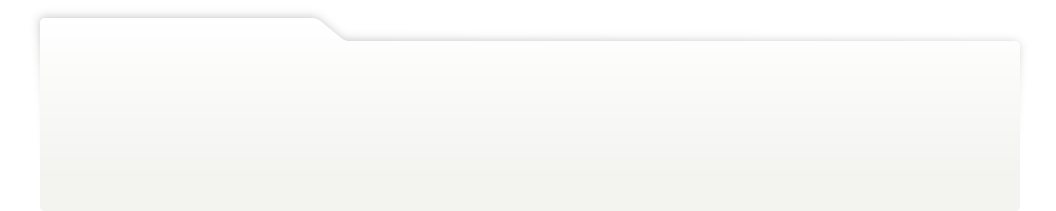
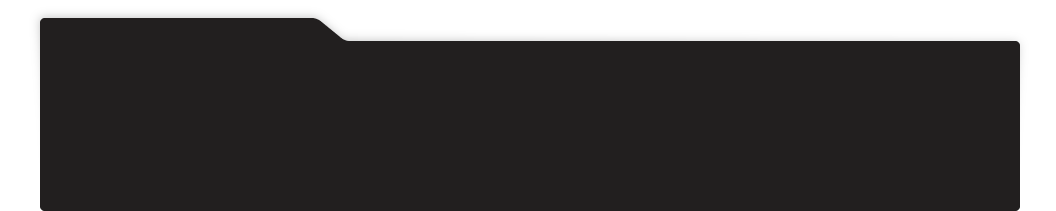
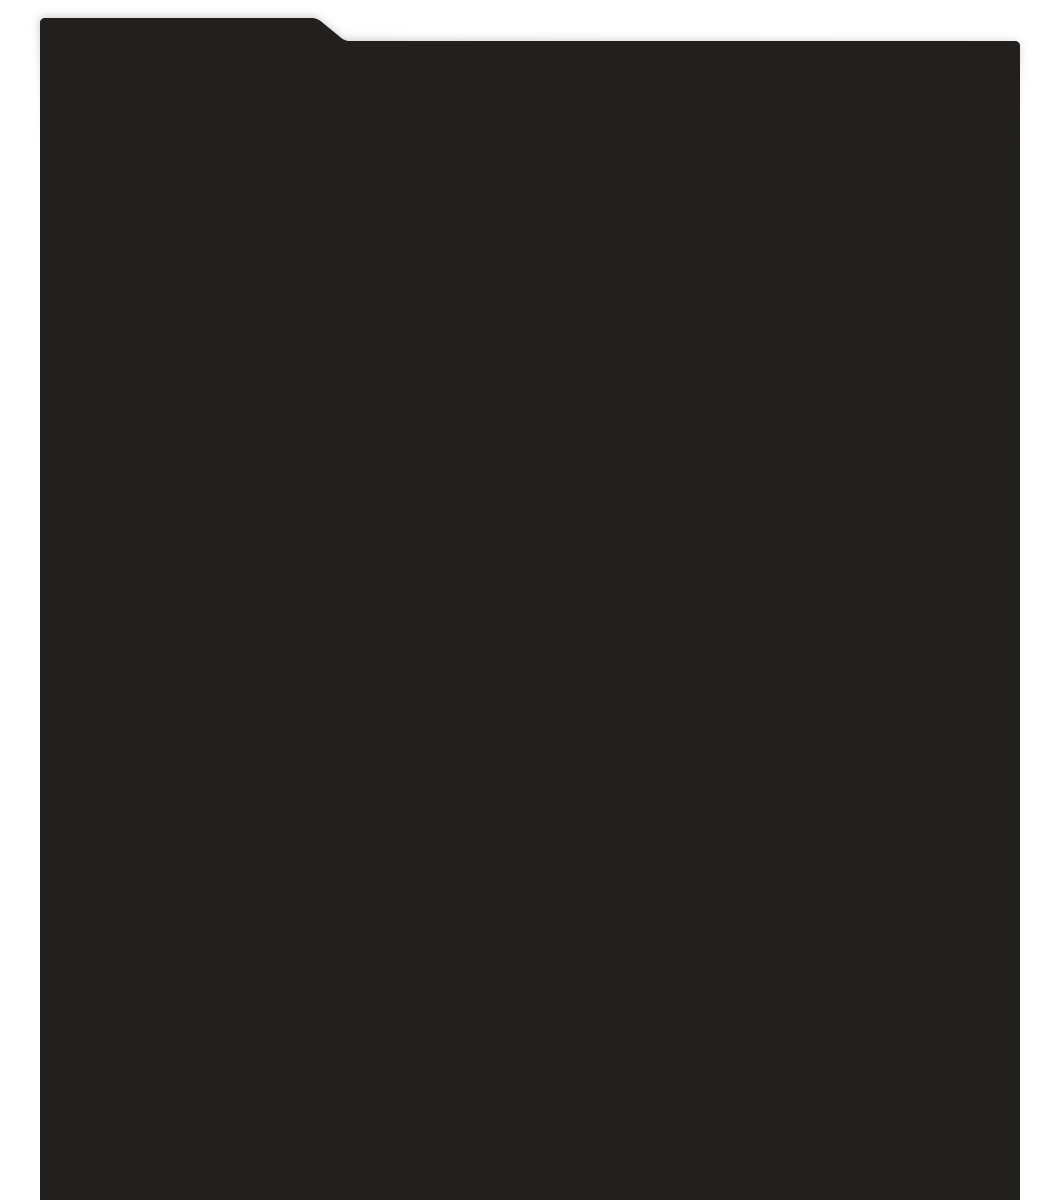
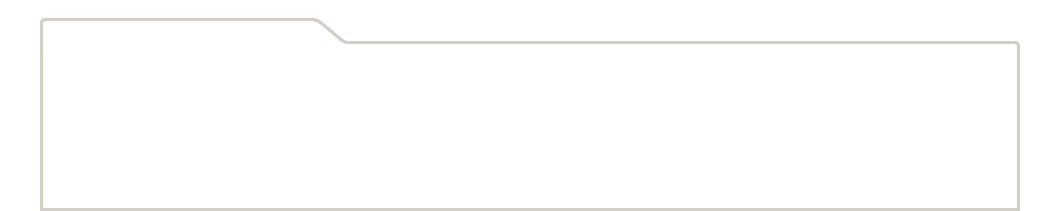
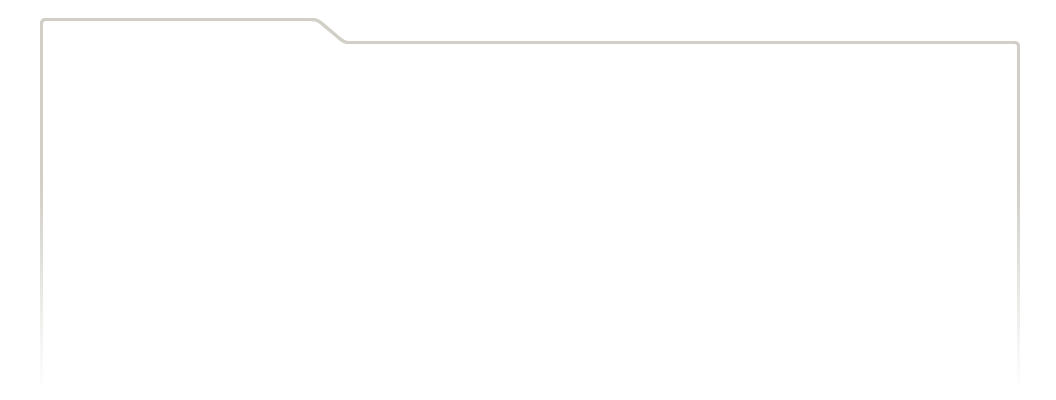
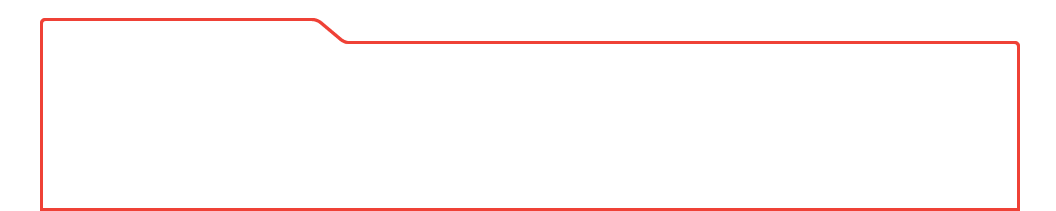
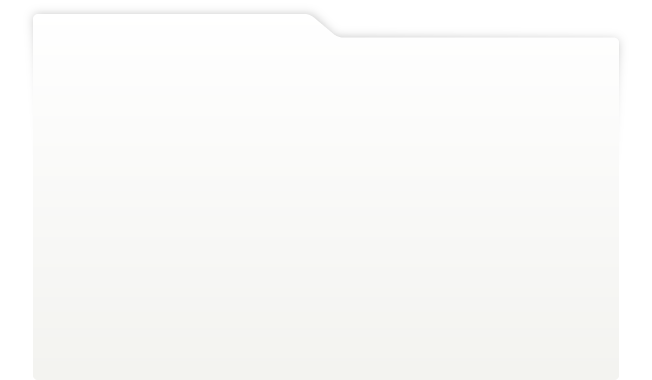
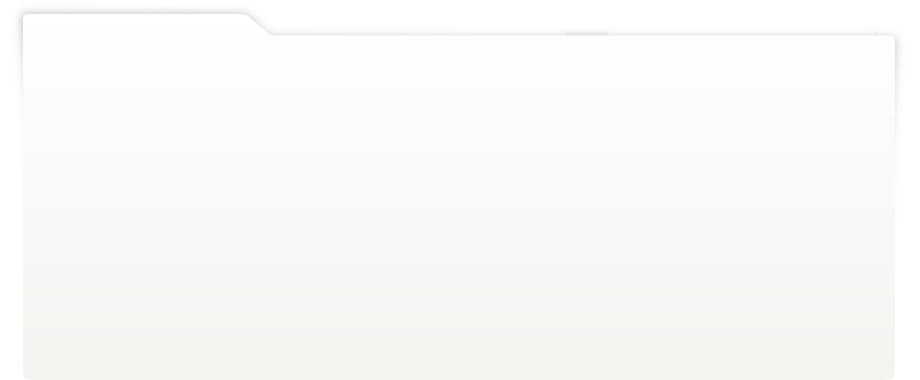
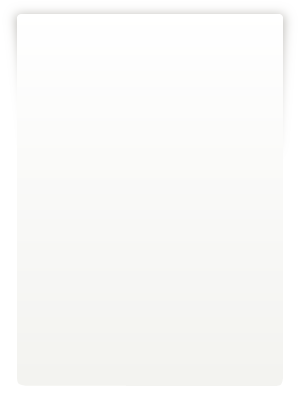
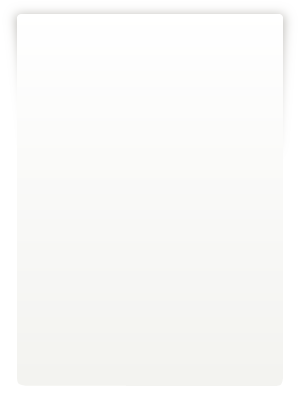
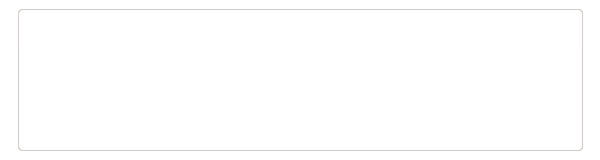
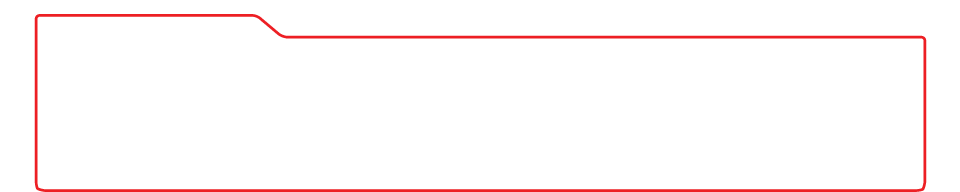
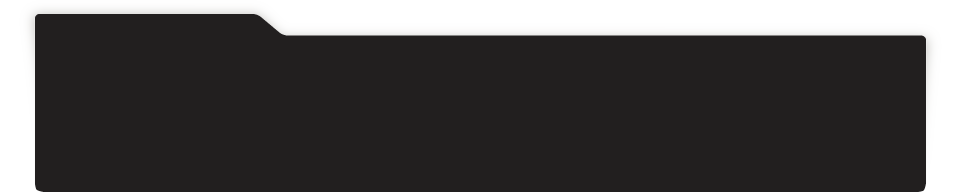
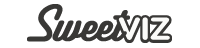
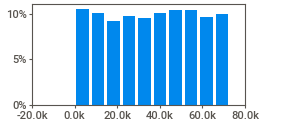
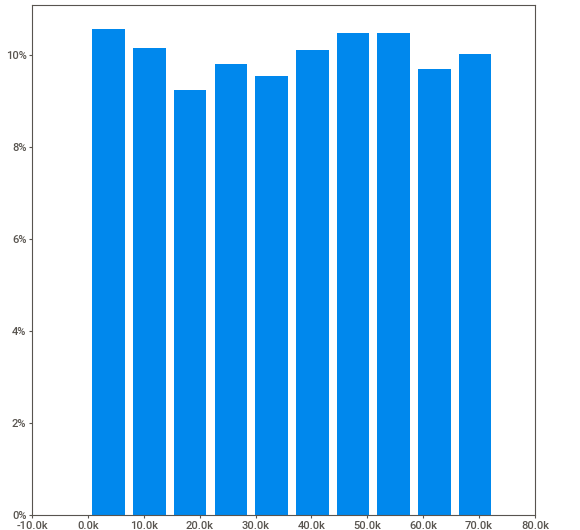
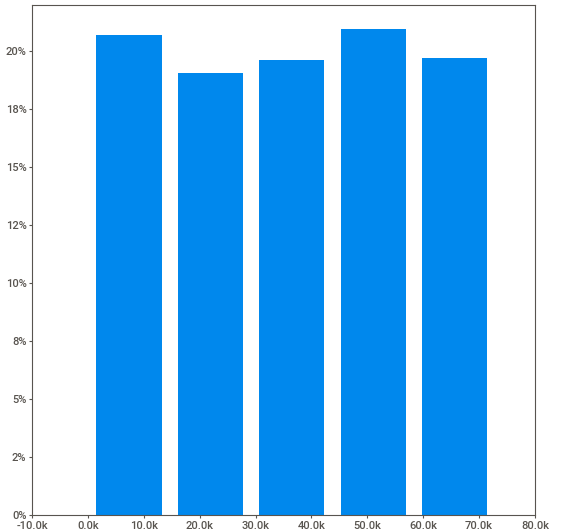
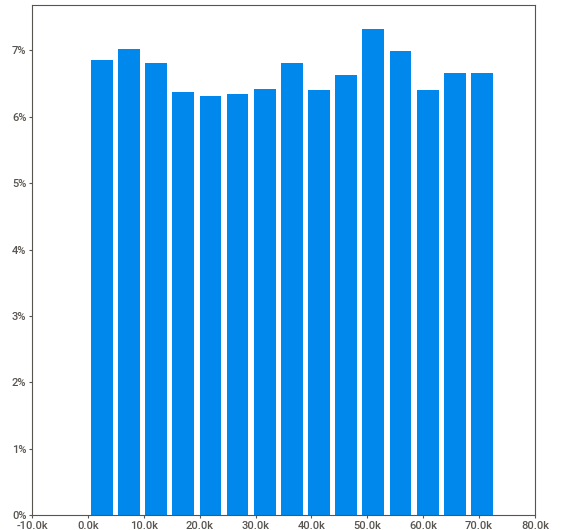
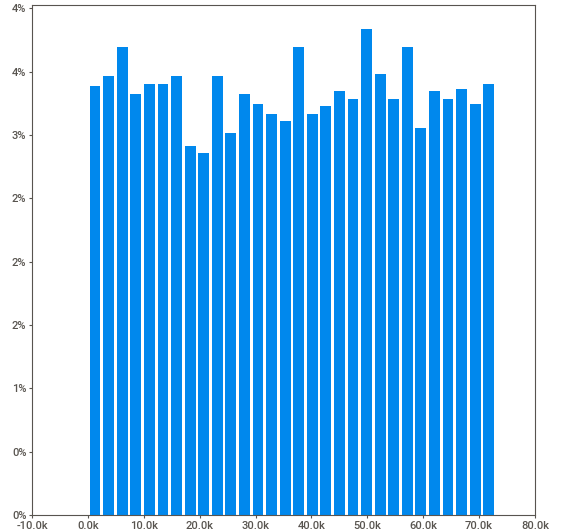
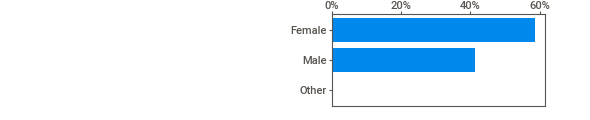
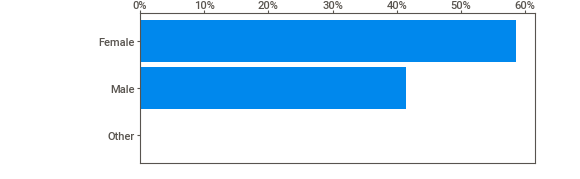
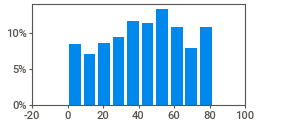
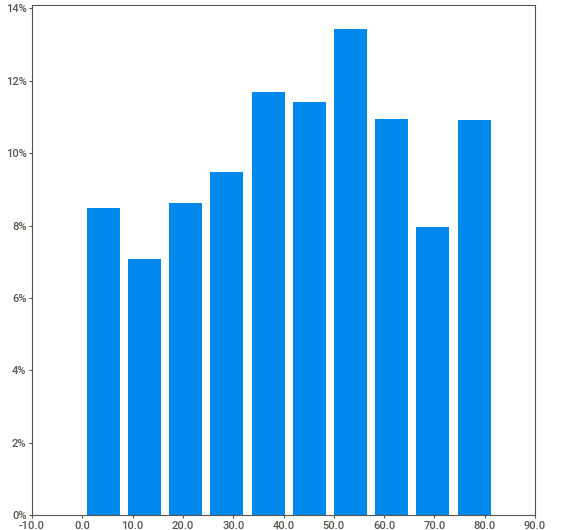
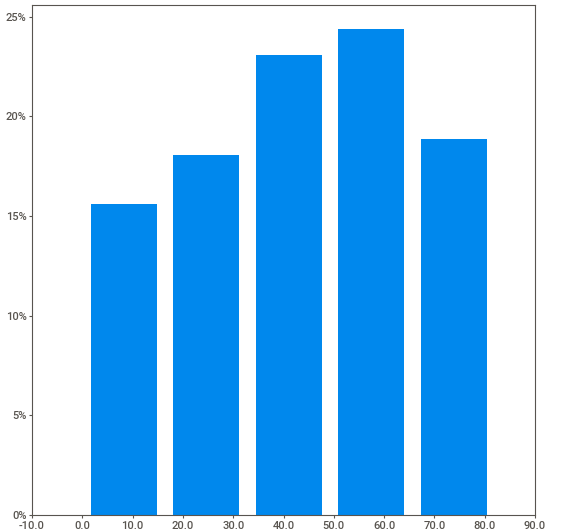
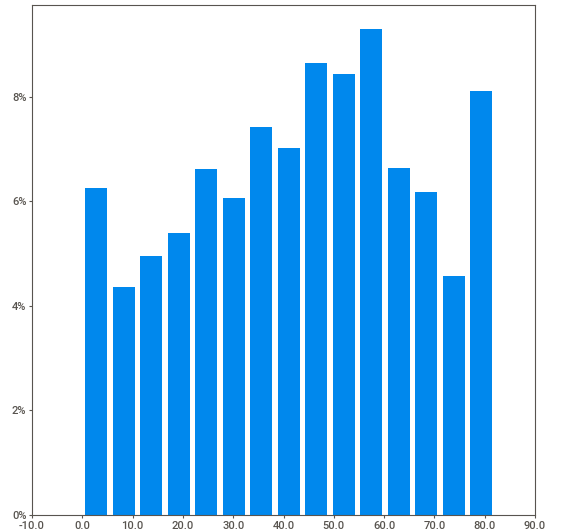
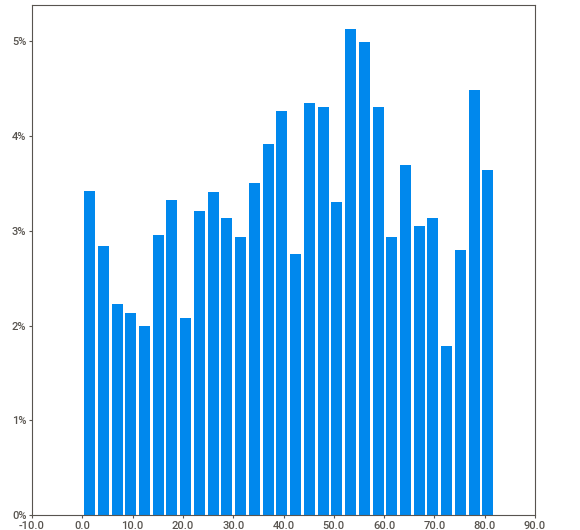
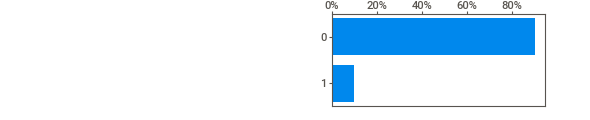
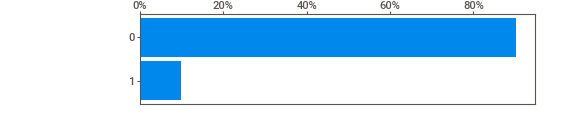
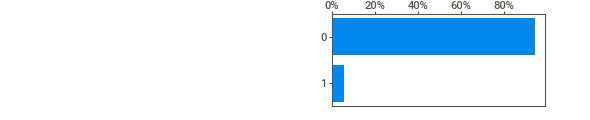
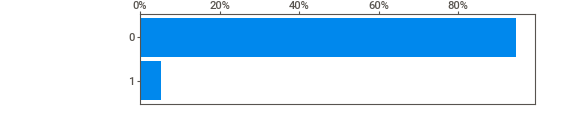
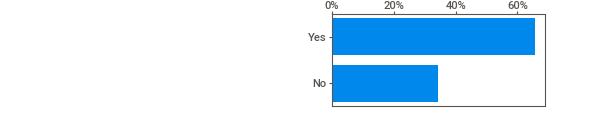
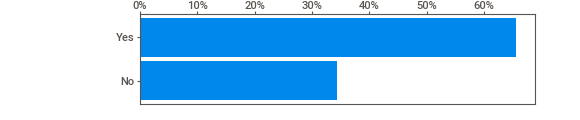
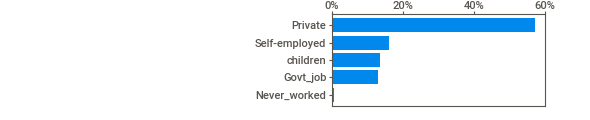
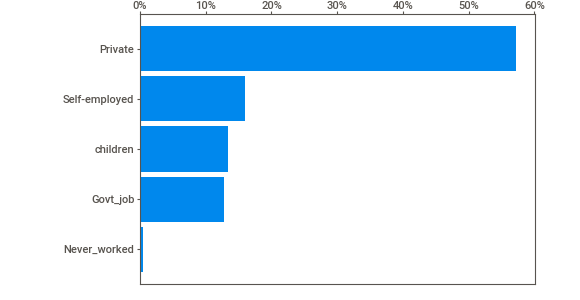
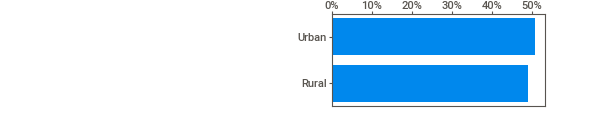
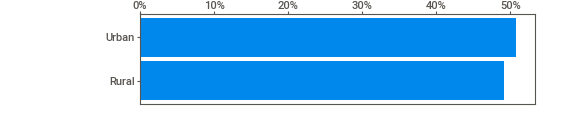
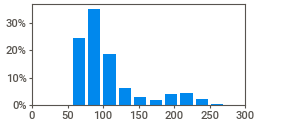
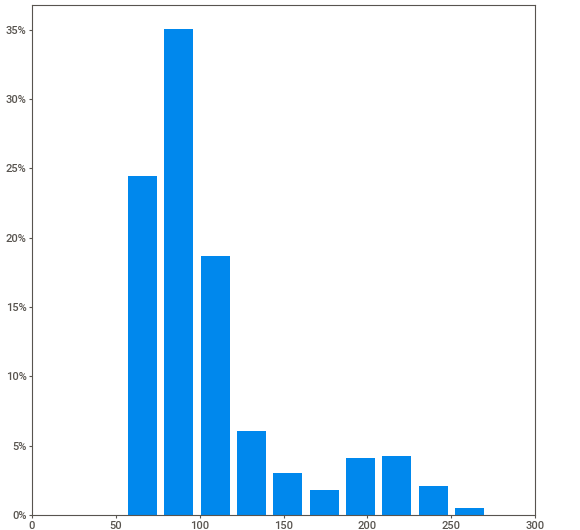
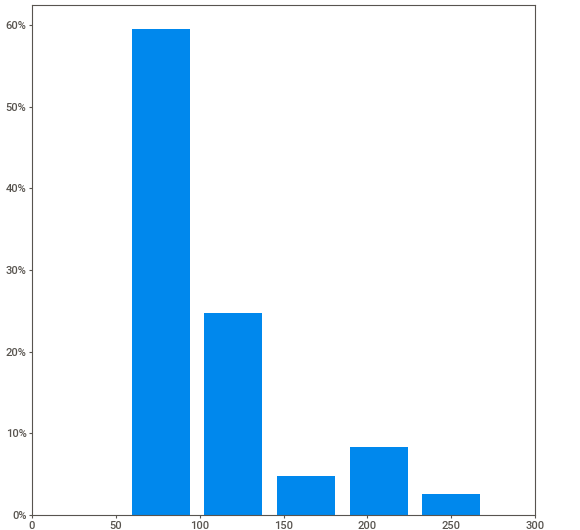
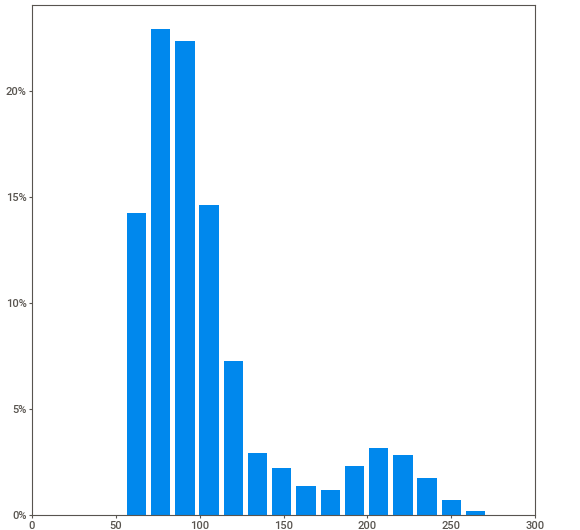
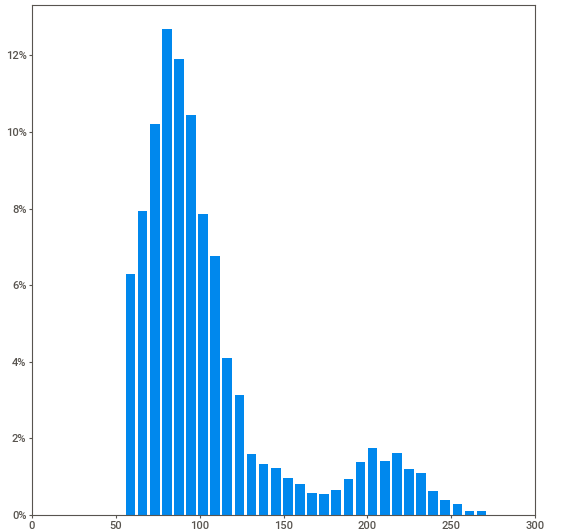
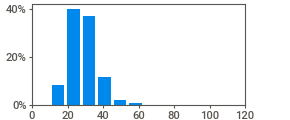
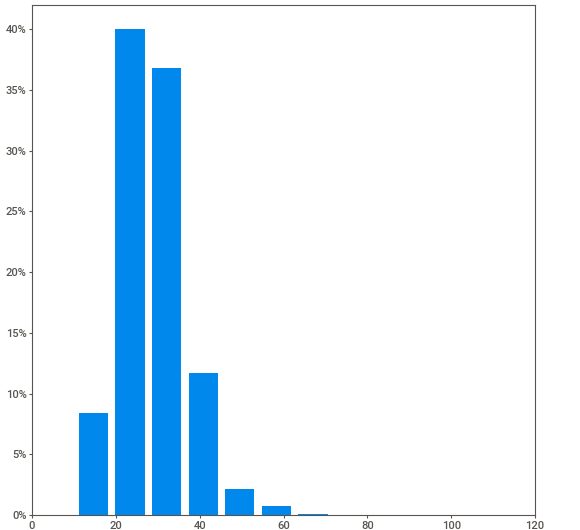
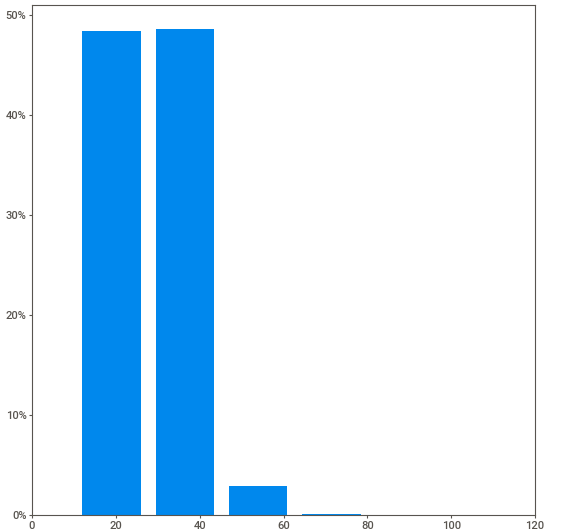
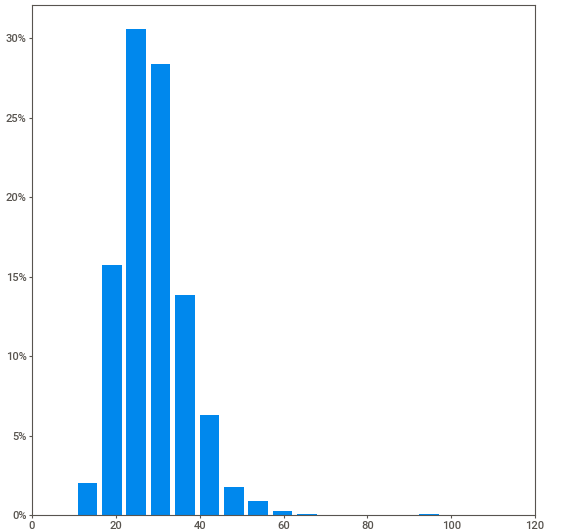
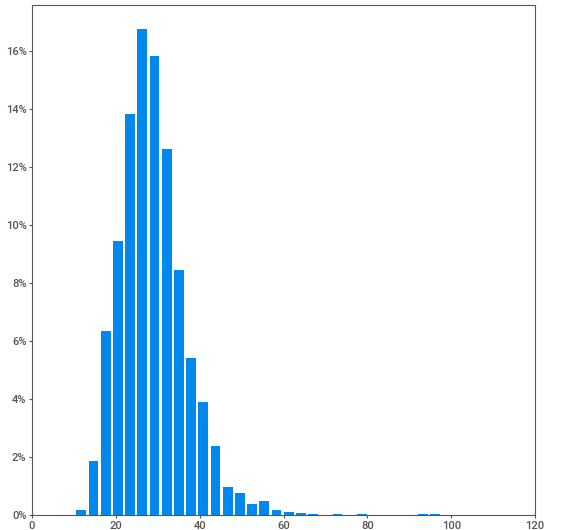
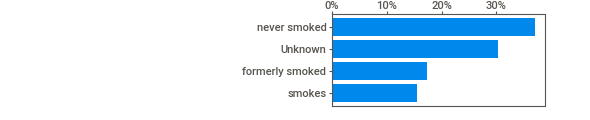
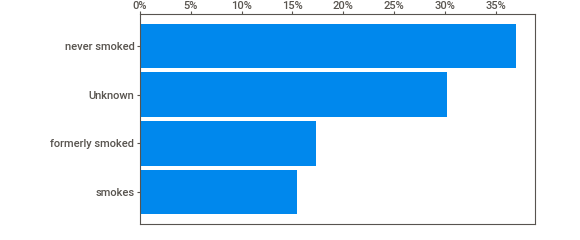
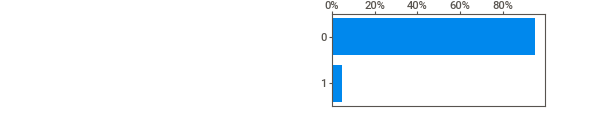
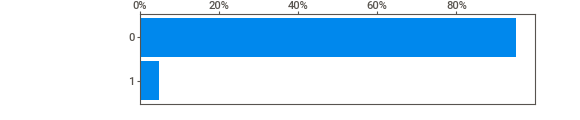
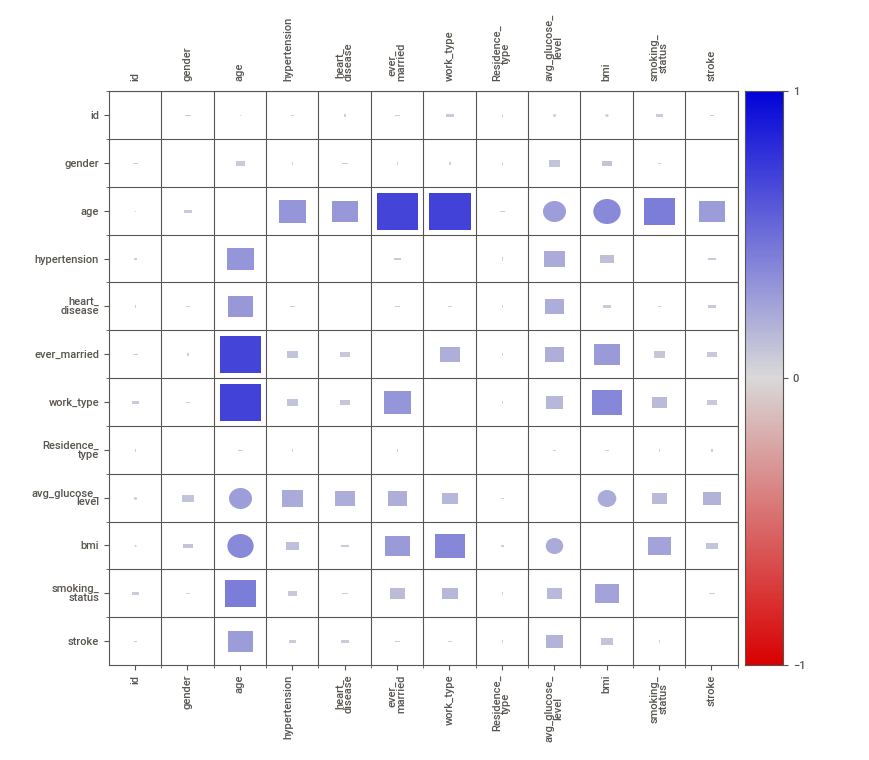
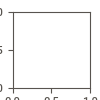

In [ ]:
IPython.display.HTML('analize.html')

| Atributo      | Descripción | Tipo|
| ----------- | ----------- |----------- |
| id      | Identificador       | ? |
| gender   | Género        | Categórica |
| age   | Edad        |Numérica |
| hypertension   | Indicador de presencia de hipertensión        | Categórica |
| heart_disease   | Indicador de presencia de enfermedad cardíaca        | Categórica |
| ever_married   | Indica si el sujeto alguna vez estuvo casado         |Categórica |
| work_type   | Tipo de trabajo        |Categórica |
| Residence_type   | Tipo de residencia        | Categórica |
| avg_glucose_level   | Nivel promedio de la glucosa en sangre        | Numérica |
| bmi   | [Body Mass Index (Índice de masa corporal)](https://www.cdc.gov/healthyweight/assessing/bmi/index.html#:~:text=Body%20Mass%20Index%20(BMI)%20is,or%20health%20of%20an%20individual.)|Numérica |
| smoking_status   |  [Tipo de fumador o no❓❓](https://www.cdc.gov/nchs/nhis/tobacco/tobacco_glossary.htm)     |Categórica |
| stroke   | Indicador de si alguna vez ha sufrido algún accidente cerebrovascular        |Categórica |

### Edad

Análisis exploratorio de la edad. 

* Entender los valores menores a 1
* Valores atípicos de work_type y smoking_status para menores


In [ ]:
df_strokes[df_strokes.work_type == "children"].sort_values("age", ascending=False)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3357,32717,Male,16.00,0,0,No,children,Rural,106.11,22.4,Unknown,0
1455,72132,Male,16.00,0,0,No,children,Urban,102.30,21.9,Unknown,0
4604,46691,Male,16.00,0,0,No,children,Urban,140.10,38.7,never smoked,0
921,32554,Female,16.00,0,0,No,children,Rural,109.02,19.8,Unknown,0
3719,49095,Female,16.00,0,0,No,children,Urban,64.51,21.2,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4021,8247,Male,0.16,0,0,No,children,Urban,109.52,13.9,Unknown,0
3968,41500,Male,0.16,0,0,No,children,Rural,69.79,13.0,Unknown,0
3618,22877,Male,0.16,0,0,No,children,Urban,114.71,17.4,Unknown,0
3295,29955,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0


In [ ]:
df_strokes[df_strokes.age < 1].work_type.value_counts()

children    43
Name: work_type, dtype: int64

In [ ]:
df_strokes[
    np.logical_and((df_strokes.smoking_status == "Unknown"), (df_strokes.age < 1))
].work_type.value_counts()

children    43
Name: work_type, dtype: int64

In [ ]:
df_strokes[df_strokes.age < 1].head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
363,7559,Female,0.64,0,0,No,children,Urban,83.82,24.9,Unknown,0
376,22706,Female,0.88,0,0,No,children,Rural,88.11,15.5,Unknown,0
564,61511,Female,0.32,0,0,No,children,Rural,73.71,16.2,Unknown,0
982,54747,Male,0.88,0,0,No,children,Rural,157.57,19.2,Unknown,0
996,53279,Male,0.24,0,0,No,children,Rural,118.87,16.3,Unknown,0
1093,66772,Female,0.32,0,0,No,children,Rural,55.86,16.0,Unknown,0
1206,68908,Female,0.72,0,0,No,children,Urban,66.36,23.0,Unknown,0
1317,30084,Male,0.80,0,0,No,children,Rural,98.67,17.5,Unknown,0
1600,40544,Male,0.40,0,0,No,children,Urban,109.56,14.3,Unknown,0
1614,47350,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0


In [ ]:
df_strokes[(df_strokes.work_type == "children")].smoking_status.value_counts()

Unknown            618
never smoked        54
formerly smoked     13
smokes               2
Name: smoking_status, dtype: int64

In [ ]:
df_strokes[
    np.logical_and((df_strokes.work_type == "children"), (df_strokes.age < 10))
].smoking_status.value_counts()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1512,4833,Female,12.0,0,0,No,children,Rural,207.45,25.4,smokes,0
2013,64128,Male,10.0,0,0,No,children,Urban,63.08,20.5,smokes,0


In [ ]:
df_strokes[
    np.logical_and((df_strokes.work_type == "children"), (df_strokes.age < 10))
].smoking_status.value_counts()

Unknown    470
Name: smoking_status, dtype: int64

In [ ]:
df_strokes[df_strokes.age < 10].smoking_status.value_counts()

Unknown    472
Name: smoking_status, dtype: int64

In [ ]:
# Fix: unknow como nunca fumaron
df_strokes.loc[(df_strokes.age < 10), "smoking_status"] = "never smoked"

In [ ]:
df_strokes[df_strokes.age < 12].work_type.value_counts()

children         541
Private            1
Self-employed      1
Name: work_type, dtype: int64

In [ ]:
df_strokes[np.logical_and((df_strokes.work_type == "Private"), (df_strokes.age < 12))]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
251,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0


In [ ]:
df_strokes[
    np.logical_and((df_strokes.work_type == "Self-employed"), (df_strokes.age < 12))
]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
410,54975,Male,7.0,0,0,No,Self-employed,Rural,64.06,18.9,never smoked,0


In [ ]:
df_strokes[
    np.logical_and((df_strokes.work_type == "Never_worked"), (df_strokes.age < 12))
]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [ ]:
# Fix: Mal taggeado never_work para children
df_strokes.loc[
    np.logical_and((df_strokes.work_type == "Never_worked"), (df_strokes.age < 14)),
    "work_type",
] = "children"

In [ ]:
# Fix: < 10, worktype = 'children'
df_strokes.loc[(df_strokes.age < 10), "work_type"] = "children"

### Categoricos

In [ ]:
round (df_strokes.describe(exclude = ['float', 'int64']),2)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2924,2596,2364


In [ ]:
# Variables identificadas como categóricas
# Descripción y transformación de object a categóricas

for i in [
    "gender",
    "hypertension",
    "heart_disease",
    "ever_married",
    "work_type",
    "Residence_type",
    "smoking_status",
    "stroke",
]:
    print(f"Variable: {i}")
    df_strokes[i].value_counts()
    print(f"Cantidad de valores que toma: {df_strokes[i].value_counts().count()}")
    df_strokes[i] = df_strokes[i].astype("category")

gender
	 ['Female', 'Male', 'Other']
	 [2994, 2115, 1]
	 Cant. valores únicos: 3
hypertension
	 [0, 1]
	 [4612, 498]
	 Cant. valores únicos: 2
heart_disease
	 [0, 1]
	 [4834, 276]
	 Cant. valores únicos: 2
ever_married
	 ['Yes', 'No']
	 [3353, 1757]
	 Cant. valores únicos: 2
work_type
	 ['Private', 'Self-employed', 'children', 'Govt_job', 'Never_worked']
	 [2924, 818, 692, 657, 19]
	 Cant. valores únicos: 5
Residence_type
	 ['Urban', 'Rural']
	 [2596, 2514]
	 Cant. valores únicos: 2
smoking_status
	 ['never smoked', 'Unknown', 'formerly smoked', 'smokes']
	 [2364, 1072, 885, 789]
	 Cant. valores únicos: 4
stroke
	 [0, 1]
	 [4861, 249]
	 Cant. valores únicos: 2


In [ ]:
# Visualizar la distribución de valores para una variable (En porcentaje)
df_strokes["gender"].value_counts(normalize=True)

Female    0.585910
Male      0.413894
Other     0.000196
Name: gender, dtype: float64

In [ ]:
# Visualización de dtypes corregidos
df_strokes.dtypes

id                      int64
gender               category
age                   float64
hypertension         category
heart_disease        category
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke               category
dtype: object

## Discretizacion


In [ ]:
# Discretización - Binning de variables numéricas
df_strokes["bmi_discretizada"] = pd.cut(
    df_strokes["bmi"],
    bins=[0, 19, 25, 30, 10000],
    labels=["bajo_peso", "ideal", "sobrepeso", "obesidad"],
)
df_strokes["age_discretizada"] = pd.cut(
    df_strokes["age"],
    bins=[0, 13, 18, 45, 60, 200],
    labels=["niño", "adolescente", "adulto", "adulto_mayor", "senectud"],
)
# Senectud podría ser tercera_edad
df_strokes["glucose_discretizada"] = pd.cut(
    df_strokes["avg_glucose_level"],
    bins=[0, 90, 160, 230, 500],
    labels=["bajo", "normal", "alto", "muy_alto"],
)

## Encoding y categoricas

In [ ]:
# Encodings
# Ref: https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

# Para las variables True/False codificar usando el valor del categórico
df_strokes["ever_married_cat"] = df_strokes["ever_married"].cat.codes
df_strokes["resident_type_urban"] = df_strokes["Residence_type"].cat.codes

# Para las variables con múltiples valores usando one-hot-encoding
# Instancia de one-hot-encoder
enc = OneHotEncoder(handle_unknown="ignore")


enc_df = pd.DataFrame(
    enc.fit_transform(df_strokes[["gender"]]).toarray(),
    columns=enc.get_feature_names(["gender"]),
)

df_strokes = df_strokes.join(enc_df)
enc_df = pd.DataFrame(
    enc.fit_transform(df_strokes[["work_type"]]).toarray(),
    columns=enc.get_feature_names(["work_type"]),
)

# Observación, como se nombró en una clase de consulta, pensamos en utilizar
#    label_encoding para esta variable, porque hay cierta ordinalidad en los valores.
#    Pero lo cierto es que no tenemos dimensión de la magnitud que separa los valores
#    y usar label_encoding puede ser darle un orden que 'deforma' el dataset.
df_strokes = df_strokes.join(enc_df)
enc_df = pd.DataFrame(
    enc.fit_transform(df_strokes[["smoking_status"]]).toarray(),
    columns=enc.get_feature_names(["smoking_status"]),
)

# Merge con el df encodeado
df_strokes = df_strokes.join(enc_df)

NameError: ignored

In [ ]:
df_strokes.columns

In [ ]:
# Renombrado de columnas resultantes en el one-hot-encoding que quedaron con espacios
df_strokes.rename(
    columns={
        "smoking_status_never smoked": "smoking_status_never_smoked",
        "smoking_status_formerly smoked": "smoking_status_formerly_smoked",
    },
    inplace=True,
)

In [ ]:
analize_report = sv.analyze(df_encodeado)
analize_report.show_html("analize_encoded.html", open_browser=True)

In [ ]:
IPython.display.HTML("analize_encoded.html")

In [ ]:
# Dataset con encoding
#   * Drop de columnas a las que se hizo el encoding
#      ( Esto es necesario para el correcto trabajo del árbol)
#   * Drop de columnas discretizadas porque no parecen aportar mayor valor
df_encodeado = df_strokes.copy(deep=True)
columns_to_drop = [
    "gender",
    "work_type",
    "Residence_type",
    "ever_married",
    "smoking_status",
    "id",
    "bmi_discretizada",
    "age_discretizada",
    "glucose_discretizada",
]
df_encodeado = df_encodeado.drop(labels=columns_to_drop, axis=1)
df_encodeado.columns

In [ ]:
col_encodeadas = [
    "age",
    "hypertension",
    "heart_disease",
    "avg_glucose_level",
    "bmi",
    "ever_married_cat",
    "resident_type_urban",
    "gender_Female",
    "gender_Male",
    "gender_Other",
    "work_type_Govt_job",
    "work_type_Never_worked",
    "work_type_Private",
    "work_type_Self-employed",
    "work_type_children",
    "smoking_status_Never_worked",
    "smoking_status_Unknown",
    "smoking_status_formerly smoked",
    "smoking_status_never smoked",
    "smoking_status_smokes",
]

## Datos faltantes

---
b) Reportar si hay valores faltantes. ¿Cuántos son y en qué atributos se encuentran? En caso de haberlos, ¿es necesario y posible asignarles un valor?  
***


Los datos faltantes están en: 
* bmi
* smoking_status	 ('Unknown')

? Para hombre, la correlacion edad-bmi es de .42 (Para mujeres .28 y en general .3). 
? Podemos estimar o tomar alguna decisión con 'Unknown'.

### BMI

In [ ]:
df_strokes['bmi_inputation_mean'] = df_strokes['bmi']
df_strokes['bmi_inputation_knn'] = df_strokes['bmi']
df_strokes

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,ever_married_cat,resident_type_urban,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes,bmi_inputation_mean,bmi_inputation_knn
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,36.6,36.6
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,32.5,32.5
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,34.4,34.4
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,24.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,40.0,40.0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,30.6,30.6
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,25.6,25.6


Imputación:
- BMI
  - Media general
  - Por la media segmentada
  - KNN
  
- **TBD** H2O no es para imputación sino que es un otro modelo más robusto. ¿Hacer una última corrida y comparar con el mejor árbol? 
  - H2O es un otro algoritmo que hace no se ve complicado con el manejo de variables categóricas y missing values. (ver este tema desde el notebook)

**TBD**: Realizarla 'modelo' sobre el train, ajustar despues con el 'modelo' entrenado sobre test.  

Correlaciones entre variables numericas y bmi

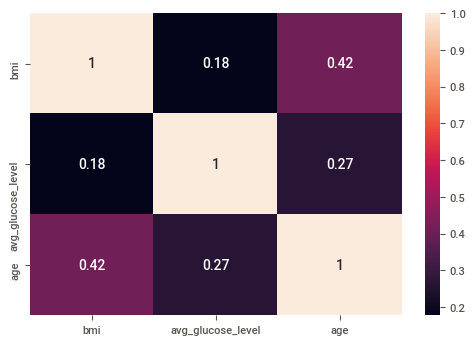

In [ ]:
df_hombres = df_strokes[df_strokes.gender == "Male"]
sns.heatmap(data=df_hombres[["bmi", "avg_glucose_level", "age"]].corr(), annot=True)

In [ ]:
df_hombres = df_strokes[df_strokes.gender == "Female"]
sns.heatmap(data=df_hombres[["bmi", "avg_glucose_level", "age"]].corr(), annot=True)

In [ ]:
# TBD: Grafica relación en BMI-work_type
# Aporta? O hacer ruido?
sns.boxplot(df_strokes.bmi, df_strokes.work_type)

In [ ]:
**TBD** 
Conclusión de que pensamos, que probamos, y porque nos quedamos con KNN?

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,ever_married_cat,resident_type_urban,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes,bmi_inputation_mean,bmi_inputation_knn
270,72911,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,60.9,60.9
358,66333,Male,52.0,0,0,Yes,Self-employed,Urban,78.40,64.8,never smoked,0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,64.8,64.8
466,1307,Female,61.0,1,0,Yes,Private,Rural,170.05,60.2,smokes,0,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,60.2,60.2
544,545,Male,42.0,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,71.9,71.9
928,41097,Female,23.0,1,0,No,Private,Urban,70.03,78.0,smokes,0,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,78.0,78.0
1559,37759,Female,53.0,0,0,Yes,Private,Rural,72.63,66.8,Unknown,0,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,66.8,66.8
2128,56420,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,97.6,97.6
2764,20292,Female,24.0,0,0,Yes,Private,Urban,85.55,63.3,never smoked,0,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,63.3,63.3
2840,65895,Female,52.0,0,0,Yes,Private,Urban,98.27,61.2,Unknown,0,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,61.2,61.2
3825,72784,Female,52.0,0,0,Yes,Private,Rural,118.46,61.6,smokes,0,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,61.6,61.6


### Imputacion BMI

In [ ]:
# Media general
df_strokes.bmi.mean()

28.893236911794673

In [ ]:
# Imputación por media
df_strokes.bmi_inputation_mean = df_strokes.bmi_inputation_mean.fillna(
    value=df_strokes.bmi.mean()
)
df_strokes[df_strokes.bmi.isna()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,ever_married_cat,resident_type_urban,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes,bmi_inputation_mean,bmi_inputation_knn
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,28.893237,NaN
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,28.893237,NaN
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1,1,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,28.893237,NaN
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1,0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,28.893237,NaN
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,28.893237,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,28.893237,NaN
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0,1,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,28.893237,NaN
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0,1,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,28.893237,NaN
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,28.893237,NaN


In [ ]:
# Imputación por media de cada tipo de work_type
df_strokes["bmi_inputation_work_type"] = df_strokes.bmi
for tipo in df_strokes.work_type.unique().to_list():
    df_strokes.loc[
        (df_strokes.work_type == tipo), "bmi_inputation_work_type"
    ] = df_strokes[df_strokes["work_type"] == tipo].bmi_inputation_work_type.fillna(
        value=df_strokes[df_strokes["work_type"] == tipo].bmi.mean()
    )

In [ ]:
df_strokes[
    [
        "age",
        "hypertension",
        "heart_disease",
        "avg_glucose_level",
        "bmi",
        "ever_married_cat",
        "resident_type_urban",
        "gender_Female",
        "gender_Male",
        "gender_Other",
        "work_type_Govt_job",
        "work_type_Never_worked",
        "work_type_Private",
        "work_type_Self-employed",
        "work_type_children",
        "smoking_status_Unknown",
        "smoking_status_formerly_smoked",
        "smoking_status_never_smoked",
        "smoking_status_smokes",
        "stroke",
    ]
]

,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married_cat,resident_type_urban,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes,stroke
0,67.0,0,1,228.69,36.6,1,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,61.0,0,0,202.21,NaN,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
2,80.0,0,1,105.92,32.5,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,49.0,0,0,171.23,34.4,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,79.0,1,0,174.12,24.0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,NaN,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
5106,81.0,0,0,125.20,40.0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
5107,35.0,0,0,82.99,30.6,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
5108,51.0,0,0,166.29,25.6,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [ ]:
# Imputación por KNN
# TBD: Train-val-Test
knn_imputer = KNNImputer(n_neighbors=2)

df_strokes_knn = df_strokes[
    [
        "age",
        "hypertension",
        "heart_disease",
        "avg_glucose_level",
        "bmi",
        "ever_married_cat",
        "resident_type_urban",
        "gender_Female",
        "gender_Male",
        "gender_Other",
        "work_type_Govt_job",
        "work_type_Never_worked",
        "work_type_Private",
        "work_type_Self-employed",
        "work_type_children",
        "smoking_status_Unknown",
        "smoking_status_formerly_smoked",
        "smoking_status_never_smoked",
        "smoking_status_smokes",
        "stroke",
    ]
].copy(deep=True)
df_strokes_knn.iloc[:, :] = knn_imputer.fit_transform(df_strokes_knn)

In [ ]:
# Check de imputación KNN
df_strokes_knn[df_strokes.bmi.isna()]

,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married_cat,resident_type_urban,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes,stroke
1,61.0,0.0,0.0,202.21,31.75,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
8,59.0,0.0,0.0,76.15,26.20,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
13,78.0,0.0,1.0,219.84,26.15,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
19,57.0,0.0,1.0,217.08,29.20,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
27,58.0,0.0,0.0,189.84,33.25,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,41.0,0.0,0.0,70.15,33.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5048,40.0,0.0,0.0,191.15,28.10,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5093,45.0,1.0,0.0,95.02,34.85,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5099,40.0,0.0,0.0,83.94,30.25,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df_strokes['bmi_inputation_knn'] = df_strokes_knn.bmi

In [ ]:
# Check de todas las imputaciones
df_strokes[df_strokes.bmi.isna()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,ever_married_cat,resident_type_urban,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes,bmi_inputation_mean,bmi_inputation_knn,bmi_inputation_work_type
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,28.893237,31.75,30.226486
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,28.893237,26.20,30.309146
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1,1,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,28.893237,26.15,30.309146
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1,0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,28.893237,29.20,30.522063
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,28.893237,33.25,30.309146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,28.893237,33.75,30.309146
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0,1,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,28.893237,28.10,30.309146
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0,1,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,28.893237,34.85,30.522063
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,28.893237,30.25,30.309146


In [ ]:
df_strokes.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'ever_married_cat', 'resident_type_urban',
       'gender_Female', 'gender_Male', 'gender_Other', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly_smoked',
       'smoking_status_never_smoked', 'smoking_status_smokes',
       'bmi_inputation_mean', 'bmi_inputation_knn',
       'bmi_inputation_work_type'],
      dtype='object')

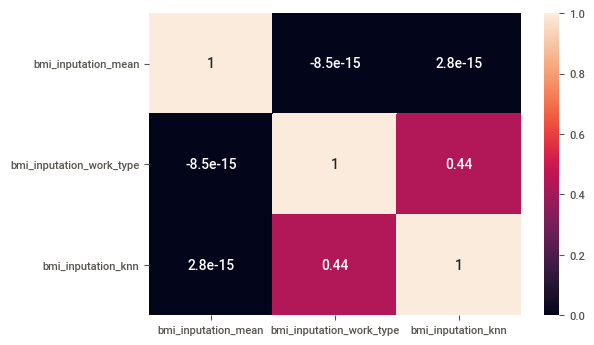

In [ ]:
# Correlación entre inputs
df_corr = df_strokes[
    df_strokes.bmi.isna()
]  # [['bmi', 'bmi_inputation_mean', 'bmi_inputation_work_type', 'bmi_inputation_knn']]
sns.heatmap(
    data=df_corr[
        ["bmi_inputation_mean", "bmi_inputation_work_type", "bmi_inputation_knn"]
    ].corr(),
    annot=True,
)

## Correlacion


c) ¿Qué variables se correlacionan más con el evento de lesión (Stroke)? Para las cuatro más correlacionadas, realizar un gráfico en el que se pueda observar la correlación entre la variable y el stroke.   
***

In [ ]:
# df_original[['hypertension', 'heart_disease']]

In [ ]:
# TBD: Meter en un mismo gráfico las categóricas, para minimizar la cantidad de gráficos
# df_original[['hypertension', 'heart_disease']].plot.bar()

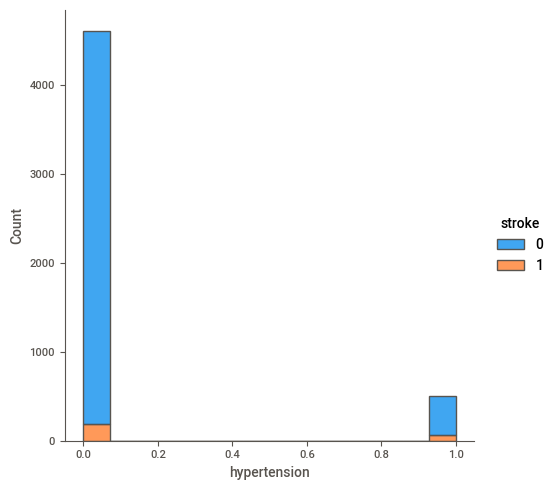

In [ ]:
# fig, ax = plt.subplots()
sns.displot(df_original, x="hypertension", hue="stroke", multiple="stack")

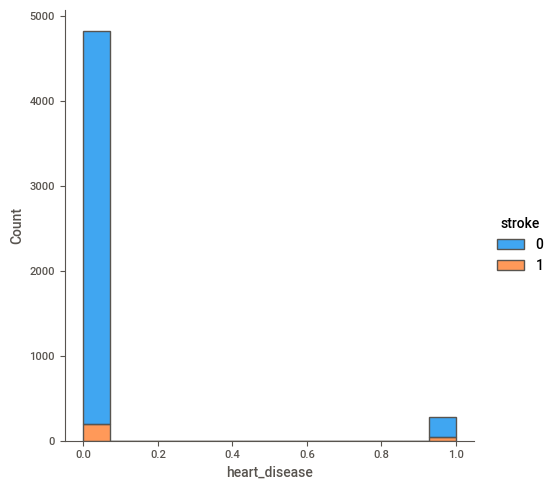

In [ ]:
sns.displot(
    df_original, x="heart_disease", hue="stroke", multiple="stack", common_norm=True
)

In [ ]:
# Gender, residence_type, work_type, smoking_status -> no 
# Heart_disease, work_type, hypertension, 

In [ ]:
# Para caso stroke positivo
#   Hay una gran variación en el caso de heart_disease (0,04 -> 0,17)
pd.crosstab(
    index=df_strokes["heart_disease"],
    columns=df_strokes["stroke"],
    margins=True,
    normalize="index",
)

stroke,0,1
hypertension,,
0,0.960321,0.039679
1,0.867470,0.132530
All,0.951272,0.048728


In [ ]:
# Para caso stroke positivo
#   Hay algunos valores interesantes:
#   * 0 en never_worked
#   * 0,002 en children
pd.crosstab(
    index=df_strokes["work_type"],
    columns=df_strokes["stroke"],
    margins=True,
    normalize="index",
)

In [ ]:
# Para caso stroke positivo
#   Hay una gran variación en el caso de hypertension (0,03 -> 0,13)
pd.crosstab(
    index=df_strokes["hypertension"],
    columns=df_strokes["stroke"],
    margins=True,
    normalize="index",
)

Lo curioso para hypertension y heart_disease es que luego no fueron relevantes para la toma de decisiones del árbol. 

**TBD** no aporta información nueva porque está implicita en edad?
Grafico comparando edad-hypertension-heart_disease y stroke.

**tbd** 
* ver como puedo hacer que priorizar variables
* multivariado hyptertension-edad -> stroke?
* multivariado heart_disease-edad -> stroke?


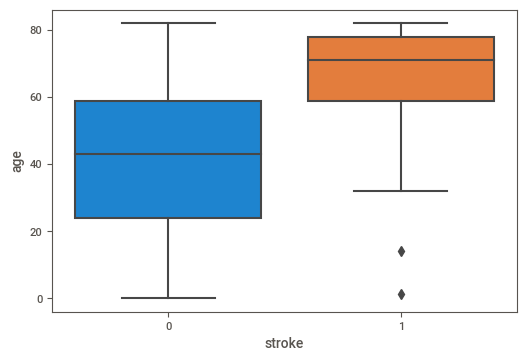

In [ ]:
sns.boxplot(x="stroke", y="age", data=df_strokes)

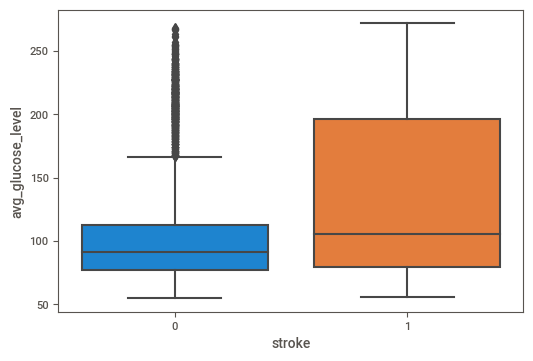

In [ ]:
sns.boxplot(x="stroke", y="avg_glucose_level", data=df_strokes)

En la relacion bmi-stroke no vemos tanto aporte de información. Las curvas se superponen.


In [ ]:
sns.violinplot(x="stroke", y="bmi", data=df_original)

FloatingPointError: ignored

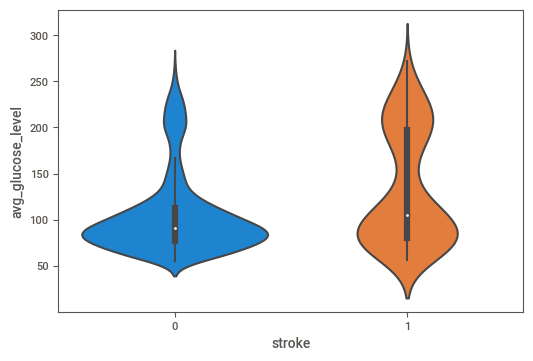

In [ ]:
sns.violinplot(x="stroke", y="avg_glucose_level", data=df_original)

# avg_glucose_level -> Parece ser bimodal y en caso de glucosa alta para stroke, hay información relevante

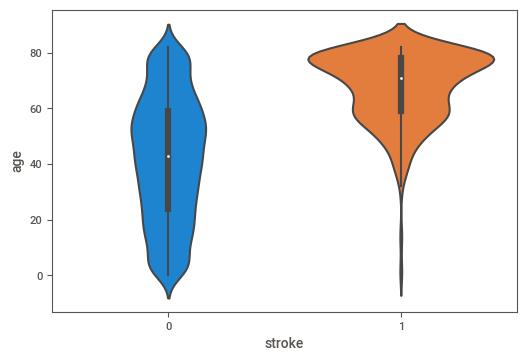

In [ ]:
# El gráfico de violín para stroke, negativo y positivo,
#    son muy diferentes. Hay un componente fuerte de la 
#    edad que explica el stroke (ACV?)
sns.violinplot(x="stroke", y="age", data=df_original)

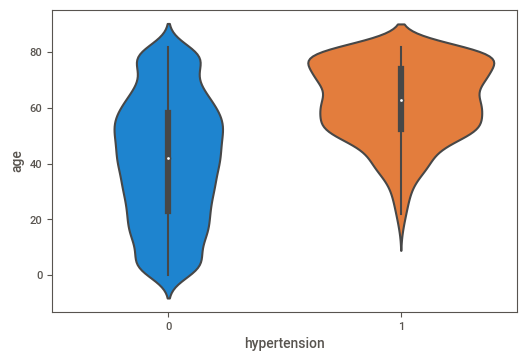

In [ ]:
sns.violinplot(x="hypertension", y="age", data=df_original)

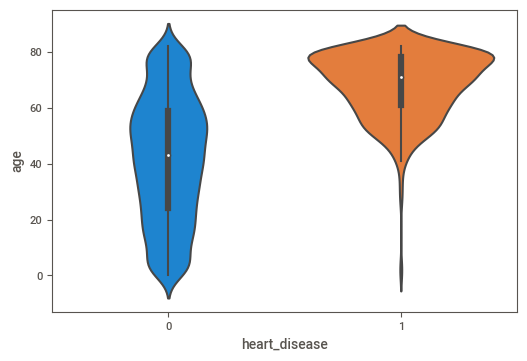

In [ ]:
sns.violinplot(x="heart_disease", y="age", data=df_original)

# TBD: Grafico de mosaico para hipertensión-stroke && heart_disease-stroke
# Ref:
# https://www.kaggle.com/bhuvanchennoju/data-stroytelling-auc-focus-on-strokes?scriptVersionId=59878979

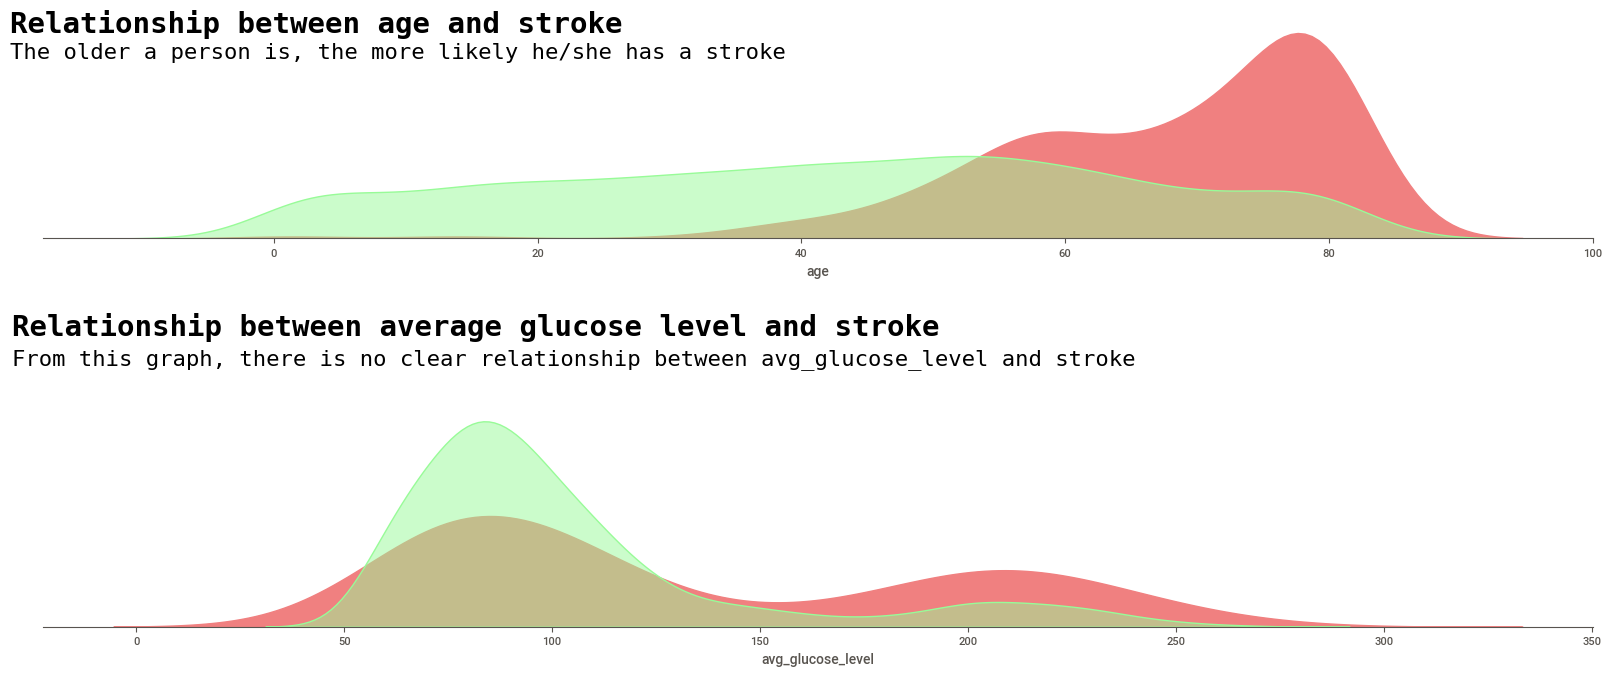

In [ ]:
fig=plt.figure(figsize=(20,8),facecolor='white')
ax=[None for i in range(2)]
gs=fig.add_gridspec(2,1)
gs.update(wspace=0, hspace=0.8)

ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[1,0])

ax[0].text(-20,0.04,'Relationship between age and stroke',fontsize=21,fontweight='bold', fontfamily='monospace')
ax[0].text(-20,0.035,'The older a person is, the more likely he/she has a stroke',fontsize=16,fontweight='light', fontfamily='monospace')
ax[1].text(-30,0.023,'Relationship between average glucose level and stroke',fontsize=21,fontweight='bold', fontfamily='monospace')
ax[1].text(-30,0.0207,'From this graph, there is no clear relationship between avg_glucose_level and stroke',fontsize=16,fontweight='light', fontfamily='monospace')

sns.kdeplot(data=df_strokes[df_strokes.stroke==1],x='age',ax=ax[0],shade=True,color='lightcoral',alpha=1)
sns.kdeplot(data=df_strokes[df_strokes.stroke==0],x='age',ax=ax[0],shade=True,color='palegreen',alpha=0.5)
sns.kdeplot(data=df_strokes[df_strokes.stroke==1],x='avg_glucose_level',ax=ax[1],shade=True,color='lightcoral',alpha=1)
sns.kdeplot(data=df_strokes[df_strokes.stroke==0],x='avg_glucose_level',ax=ax[1],shade=True,color='palegreen',alpha=0.5)

for i in range(2):
    ax[i].set_yticklabels('')
    ax[i].set_ylabel('')
    ax[i].tick_params(axis='y',length=0)
    
    for direction in ['top','right','left']:
        ax[i].spines[direction].set_visible(False)

In [ ]:
# Hacer tablita de correlacion entre categóricas

## Conclusiones correlacion y seleccion de atributos

d) Se necesita saber cuáles son los indicadores que determinan más susceptibilidad a sufrir una lesión. ¿Qué atributos utilizará como variables predictoras? ¿Por qué?  


* Edad, heart_disease, hypertension parecen ser las que mejor correlacionan
    * Heart_disease e hypertension se correlacionan muy fuerte con edad, pareciera no aportar información nueva
* Avg_glucose_level -> Parece ser bimodal y aportar información nueva


## Balanceo

----
e) ¿Se encuentra balanceado el conjunto de datos que utilizará para desarrollar el algoritmo diseñado para contestar el punto d)? En base a lo respondido, ¿qué métricas de performance reportaría y por qué? En caso de estar desbalanceado, ¿qué estrategia de balanceo utilizaría?  


No, el dataset no se encuentra balanceado.  


In [ ]:
df_strokes.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
df_strokes.stroke.value_counts(normalize=True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

Estrategias a utilizar para enfrentar el desbalanceo

* Metodos de sampling y under sampling
* Usar la feature del método de Sklearn que balancea el data set (Usado)
* Método SMOTE (**TBD**)

**Ref**: https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18

## Medidas de performance

-----
f) Suponiendo que es más importante detectar los casos en donde el evento ocurre. ¿Qué medida de performance utilizaría? Si utiliza Fβ-Score, ¿qué valor de β eligiría?  

***


### Medidas de performance

* Precision: De las instancias clasificadas como positivas, cuántas lo son (Cuán útiles son los resultados de búsqueda)
* Recall: de las instancias positivas, cuántas fueron clasificadas como positivas (Cuán completos son los resultados)

Creemos que recall es más importante, al ser un tema médico es importante cuidar la completitud de los resultados. Si alguien tiene posibilidad de tener un infarto, detectarlo y poder decir que se cuide.

El 'costo' de decirle a alguien va a sufrir un infarto pero al final no, es menor a no decirle a alguien que va a tener un infarto que no va a tenerlo.

### F-beta.

Usaríamos F1 y F2

F1 por una cuestión de generalidad, la mayoría de los métodos y librerías vienen por defecto con métricas del estilo F1, también nos parece interesante usar F2 (Porque da más peso al Recall que sería lo que queremos priorizar)

**TBD** justificación teórica del F2.

## Primer arbol

In [ ]:
df_strokes.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'ever_married_cat', 'resident_type_urban',
       'gender_Female', 'gender_Male', 'gender_Other', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly_smoked',
       'smoking_status_never_smoked', 'smoking_status_smokes',
       'bmi_inputation_mean', 'bmi_inputation_knn',
       'bmi_inputation_work_type'],
      dtype='object')

### Drop de columnas categoricas


In [ ]:
data = df_strokes.copy(deep=True)
data = data.drop(
    labels=[
        "stroke",
        "gender",
        "work_type",
        "Residence_type",
        "ever_married",
        "smoking_status",
        "bmi_inputation_mean",
        "bmi",
        "bmi_inputation_work_type",
        "id",
        "bmi_discretizada",
        "age_discretizada",
        "glucose_discretizada",
    ],
    axis=1,
)
target = df_strokes["stroke"]

data.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'ever_married_cat', 'resident_type_urban', 'gender_Female',
       'gender_Male', 'gender_Other', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly_smoked',
       'smoking_status_never_smoked', 'smoking_status_smokes',
       'bmi_inputation_knn'],
      dtype='object')

-----
g) Implementar el algoritmo introducido en el punto d) utilizando árboles de decisión. En primer lugar, se deberá separar un 20% de los datos para usarlos como conjunto de evaluación (test set). El conjunto restante (80%) es el de desarrollo y es con el que se deberá continuar haciendo el trabajo. Realizar los siguientes puntos:

1) Armar conjuntos de entrenamiento y validación con proporción 80-20 del conjunto de desarrollo de forma aleatoria. Usar 50 semillas distintas y realizar un gráfico de caja y bigotes que muestre cómo varía la métrica elegida en c) en esas 50 particiones distintas.

2) Usar validación cruzada de 50 iteraciones (50-fold cross validation). Realizar un gráfico de caja y bigotes que muestre cómo varía la métrica elegida en esas 50 particiones distintas.

***


### Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=42, stratify=target.values
)

Primeros dos árboles con y sin balanceo para ver como afecta a las métricas

### Train sin balanceo

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=42, stratify=target.values
)
arbol_sklearn = tree.DecisionTreeClassifier(
    criterion="entropy", max_depth=5, min_samples_leaf=1, ccp_alpha=0
)
# Train acc: 0.9577858540676545
# Test acc: 0.9399869536855838
arbol_sklearn.fit(x_train, y_train)
y_pred_test = arbol_sklearn.predict(x_test)
y_pred_train = arbol_sklearn.predict(x_train)

print("Train acc: {}".format(accuracy_score(y_train, y_pred_train)))
print("Test acc: {}".format(accuracy_score(y_test, y_pred_test)))
print("F1: {}".format(fbeta_score(y_test, y_pred_test, beta=1)))
print("F2: {}".format(fbeta_score(y_test, y_pred_test, beta=2)))

print(classification_report(y_test, y_pred_test))
predictions = arbol_sklearn.predict(x_test)

Train acc: 0.9549902152641878
Test acc: 0.9393346379647749
F1: 0.0
F2: 0.0
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Train con balanceo

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=42, stratify=target.values
)

arbol_sklearn = tree.DecisionTreeClassifier(
    criterion="entropy",
    max_depth=5,
    min_samples_leaf=1,
    ccp_alpha=0,
    class_weight="balanced",
)
# Train acc: 0.7978753145093654
# Test acc: 0.7932159165035877
arbol_sklearn.fit(x_train, y_train)
arbol_sklearn.predict(x_test)
y_pred_train = arbol_sklearn.predict(x_train)

print("Train acc: {}".format(accuracy_score(y_train, y_pred_train)))
print("Test acc: {}".format(accuracy_score(y_test, y_pred_test)))
print("F1: {}".format(fbeta_score(y_test, y_pred_test, beta=1)))
print("F2: {}".format(fbeta_score(y_test, y_pred_test, beta=2)))
print(classification_report(y_test, y_pred_test))

predictions = arbol_sklearn.predict(x_test)

Train acc: 0.6125244618395304
Test acc: 0.9510763209393346
F1: 0.0
F2: 0.0
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Feature importance

In [ ]:
importancia_predictores = pd.DataFrame(
    {"predictor": data.columns, "importancia": arbol_sklearn.feature_importances_}
)
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values("importancia", ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,age,0.845589
3,avg_glucose_level,0.095436
18,bmi_inputation_knn,0.042684
16,smoking_status_never_smoked,0.008304
2,heart_disease,0.007987
4,ever_married_cat,0.000000
5,resident_type_urban,0.000000
6,gender_Female,0.000000
7,gender_Male,0.000000
8,gender_Other,0.000000


## Varias semillas

 1) Armar conjuntos de entrenamiento y validación con proporción 80-20 del conjunto de desarrollo de forma aleatoria. Usar 50 semillas distintas y realizar un gráfico de caja y bigotes que muestre cómo varía la métrica elegida en c) en esas 50 particiones distintas. 

**TBD**: Train-val-test

Comparación de métricas de dos árboles con mayor y menor alfa, utilizando un for y 50 semillas distintas 

In [ ]:
all_metrics = []
metric_labels = []

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


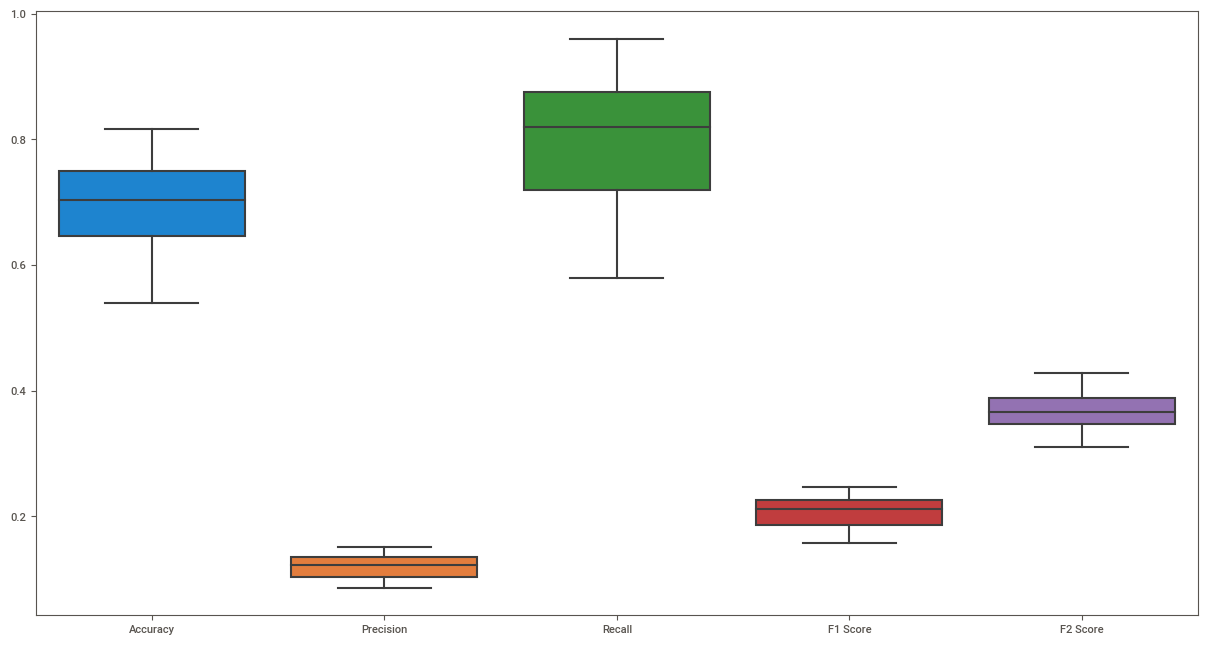

In [ ]:
output_accs = []
output_precisions = []
output_recalls = []
output_f1 = []
output_f2 = []

for i in range(50):

    x_train, x_test, y_train, y_test = train_test_split(
        data, target, test_size=0.2, random_state=i, stratify=target.values
    )
    arbol_sklearn = tree.DecisionTreeClassifier(
        criterion="gini",
        max_depth=7,
        min_samples_leaf=5,
        ccp_alpha=0.007537688442211055,
        class_weight="balanced",
    )
    arbol_sklearn.fit(x_train, y_train)

    y_pred_test = arbol_sklearn.predict(x_test)
    y_pred_train = arbol_sklearn.predict(x_train)

    output_accs.append(accuracy_score(y_test, y_pred_test))
    output_precisions.append(precision_score(y_test, y_pred_test))
    output_recalls.append(recall_score(y_test, y_pred_test))
    output_f1.append(fbeta_score(y_test, y_pred_test, beta=1))
    output_f2.append(fbeta_score(y_test, y_pred_test, beta=2))

all_metrics = output_accs + output_precisions + output_recalls + output_f1 + output_f2
metric_labels = (
    ["Accuracy"] * len(output_accs)
    + ["Precision"] * len(output_precisions)
    + ["Recall"] * len(output_recalls)
    + ["F1 Score"] * len(output_f1)
    + ["F2 Score"] * len(output_f2)
)

In [ ]:
output_accs = []
output_precisions = []
output_recalls = []
output_f1 = []
output_f2 = []

for i in range(50):

    x_train, x_test, y_train, y_test = train_test_split(
        data, target, test_size=0.2, random_state=i, stratify=target.values
    )
    arbol_sklearn = tree.DecisionTreeClassifier(
        criterion="gini",
        max_depth=7,
        min_samples_leaf=5,
        ccp_alpha=0.002512562814070352,
        class_weight="balanced",
    )
    arbol_sklearn.fit(x_train, y_train)

    y_pred_test = arbol_sklearn.predict(x_test)
    y_pred_train = arbol_sklearn.predict(x_train)

    output_accs.append(accuracy_score(y_test, y_pred_test))
    output_precisions.append(precision_score(y_test, y_pred_test))
    output_recalls.append(recall_score(y_test, y_pred_test))
    output_f1.append(fbeta_score(y_test, y_pred_test, beta=1))
    output_f2.append(fbeta_score(y_test, y_pred_test, beta=2))


all_metrics = (
    all_metrics
    + output_accs
    + output_precisions
    + output_recalls
    + output_f1
    + output_f2
)
metric_labels = (
    metric_labels
    + ["Accuracy"] * len(output_accs)
    + ["Precision"] * len(output_precisions)
    + ["Recall"] * len(output_recalls)
    + ["F1 Score"] * len(output_f1)
    + ["F2 Score"] * len(output_f2)
)

In [ ]:
len(all_metrics)

In [ ]:
hue = ["Arbol1"] * 250 + ["Arbol2"] * 250
plt.figure(figsize=(15, 8))
sns.boxplot(metric_labels, all_metrics, hue=hue)

## Kfolds

2) Usar validación cruzada de 50 iteraciones (50-fold cross validation). Realizar un gráfico de caja y bigotes que muestre cómo varía la métrica elegida en esas 50 particiones distintas.

In [ ]:
clf = tree.DecisionTreeClassifier(
    criterion="gini",
    max_depth=7,
    min_samples_leaf=5,
    ccp_alpha=0.002512562814070352,
    class_weight="balanced",
)
# clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=1, ccp_alpha=0, class_weight="balanced" )
# Perform 7-fold cross validation
scores = cross_val_score(estimator=clf, X=x_train, y=y_train, cv=50, n_jobs=4)

### Algunas métricas

Ref: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.73 accuracy with a standard deviation of 0.05


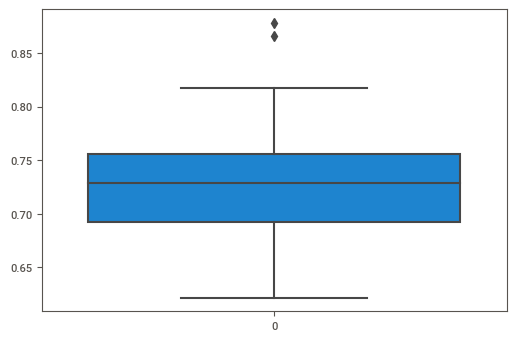

In [ ]:
sns.boxplot(data=scores)

0.53 accuracy with a standard deviation of 0.05


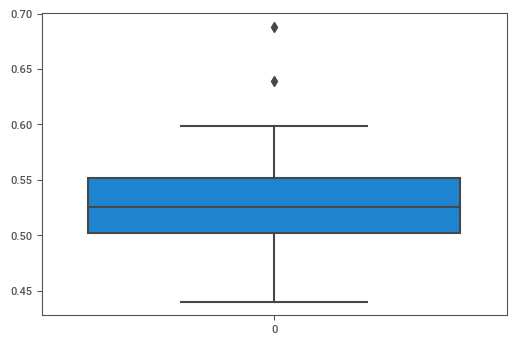

In [ ]:
# F1-score
scores = cross_val_score(estimator=clf, X=x_train, y=y_train, cv=50, n_jobs=4, scoring='f1_macro')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
sns.boxplot(data=scores)

0.13 accuracy with a standard deviation of 0.04


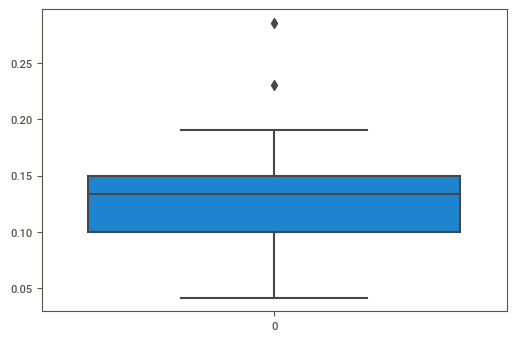

In [ ]:
# precision
scores = cross_val_score(estimator=clf, X=x_train, y=y_train, cv=50, n_jobs=4, scoring='precision')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
sns.boxplot(data=scores)

0.77 accuracy with a standard deviation of 0.22


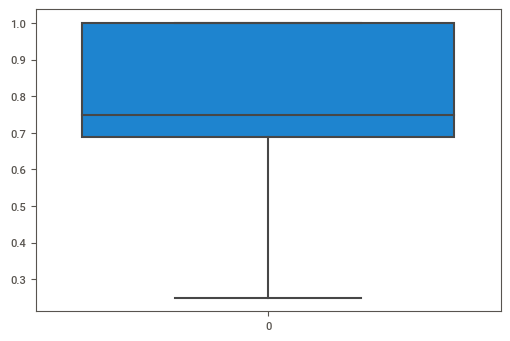

In [ ]:
#recall
scores = cross_val_score(estimator=clf, X=x_train, y=y_train, cv=50, n_jobs=4, scoring='recall')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
sns.boxplot(data=scores)

0.80 accuracy with a standard deviation of 0.12


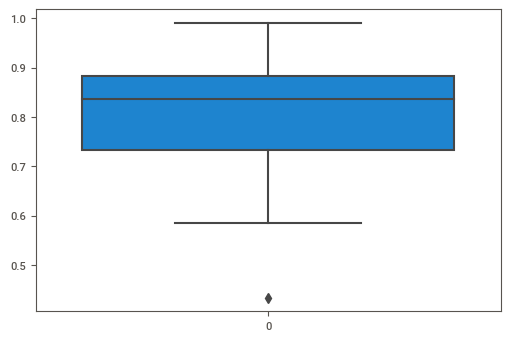

In [ ]:
#roc_auc
scores = cross_val_score(estimator=clf, X=x_train, y=y_train, cv=50, n_jobs=4, scoring='roc_auc')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
sns.boxplot(data=scores)

## Búsqueda de parámetros

x_train, x_test, y_train, y_test 

## Setup mlflow

In [ ]:
# import mlflow
# import mlflow.sklearn
# from urllib.parse import urlparse
# from mlflow.tracking import MlflowClient
# import datetime

# now = datetime.datetime.now()

In [ ]:
# mlflow.set_tracking_uri("http://mlflow_server:5000")
# tracking_uri = mlflow.get_tracking_uri()
# print("Current tracking uri: {}".format(tracking_uri))

In [ ]:
# import mlflow
# import mlflow.sklearn
# from urllib.parse import urlparse
# from mlflow.tracking import MlflowClient

# mlflow.set_tracking_uri("http://mlflow_server:5000")
# tracking_uri = mlflow.get_tracking_uri()
# print("Current tracking uri: {}".format(tracking_uri))


In [ ]:
# experiment = mlflow.set_experiment("AA.TP1.RandomizedSearchCV.{0}".format(now.strftime("%Y-%m-%d")) )

### Cantidad parametros

Podemos usar el logaritmo en base de dos de la cantidad de datos que tenemos para poder estimar la profundidad a partir de la cual overfiteamos el árbol.

**TBD** (Buscar tambien teoría que respalde)


In [ ]:
# 2 ^ n < Cant de datos
math.log2(5110)

12.287712379549449

In [ ]:
# Cantidad combinaciones
print(2 * 12 * 200 * 4)

19200


### Grid search

Sección de búsqueda de hiperparámetros. 

En la grilla de parametros están posibles valores de los hiperparámetros para que el método RandomizedSearchCV o GridSearchCV, busqué dentro de ese espacio.

Además colocamos la métrica f2 para optimizar la búsqueda, alineado a lo que venimos plantenado.

* La profundidad máxima fue 13 => Intentando minimizar la chance de overfitting
* El alfa hasta 0.01 => Intentando no tener una poda muy agresiva 
    * Esto se puede ver mejor con los gráficos del final (Referencia)
* min_samples_leaf entre 2 y 30. 

**tbd** contar mejor las iteraciones.
Empezamos con depth (1,12) => (1,30) => (1,13)
Empezamos con ccp_alpha (0, 0.1) => (0, 0.01)

Encontramos árboles de lo más diverso. 
* Alpha 0
* Profundida 19 y alfa 0.01 => Quedaba en 7 niveles. 

Buscar 2 o 3 casos curiosos y mencionarlos.

Como mostrar el avance del método de búsqueda. Verbose=1 o verbose=10. Mayor el número más info devuelve, y evitamos pensar que el método no está haciendo nada cuando está trabajando.

https://stackoverflow.com/questions/24121018/sklearn-gridsearch-how-to-print-out-progress-during-the-execution

In [ ]:
start = time.time()
# Uno podría pasar una distribución para la busqueda de hiperparámetros
# Ref de criterios -> https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680
params_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": list(range(1, 13)),
    "ccp_alpha": np.linspace(0, 0.01, 200),
    "min_samples_leaf": list(range(2, 30)),
    # cuantas muestras en nodo para poder hacer el split -> https://youtu.be/XABw4Y3GBR4?t=260
    # 'min_samples_split': list(range(2,6))
}

kfoldcv = StratifiedKFold(n_splits=50)
base_tree = DecisionTreeClassifier(class_weight="balanced")
# F1 score
# scorer_fn = make_scorer(f1_score)
# F2 score
scorer_f2 = make_scorer(fbeta_score, beta=2)
randomcv = RandomizedSearchCV(
    estimator=base_tree,
    param_distributions=params_grid,
    scoring=scorer_f2,
    cv=kfoldcv,
    n_iter=2,
    verbose=10,
)
# randomcv = GridSearchCV(
#     estimator=base_tree,
#     param_grid=params_grid,
#     scoring=scorer_f2,
#     cv=kfoldcv,
#     random_state=42,
#     verbose=10,
# )
randomcv.fit(x_train, y_train)

end = time.time()
# TBD: Busqueda bayesiana, que use gradiente ( Algo que habían compartido Joaquin y Lucas )

In [ ]:
# Tiempo de búsqueda de hiperparámetros
print(f"Tiempo: { round(end - start, 2) } segundos")

In [ ]:
#Visualizar las opciones que nos devolvió
pd.DataFrame(randomcv.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_max_depth,param_criterion,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,split20_test_score,split21_test_score,split22_test_score,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,split30_test_score,split31_test_score,split32_test_score,split33_test_score,split34_test_score,split35_test_score,split36_test_score,split37_test_score,split38_test_score,split39_test_score,split40_test_score,split41_test_score,split42_test_score,split43_test_score,split44_test_score,split45_test_score,split46_test_score,split47_test_score,split48_test_score,split49_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007294,0.001082,0.002128,0.0004,7,3,gini,0.482412,"{'min_samples_leaf': 7, 'max_depth': 3, 'crite...",0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.206186,0.206186,0.206186,0.206186,0.206186,0.206186,0.206186,0.206186,0.206186,0.206186,0.206186,0.16129,0.203689,0.006119,1
1,0.009835,0.000701,0.002073,0.0003,7,6,gini,0.251256,"{'min_samples_leaf': 7, 'max_depth': 6, 'crite...",0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.204082,0.206186,0.206186,0.206186,0.206186,0.206186,0.206186,0.206186,0.206186,0.206186,0.206186,0.206186,0.16129,0.203689,0.006119,1


In [ ]:
# Explorar la columnas para registrarlas en mlflow
aux = pd.DataFrame(randomcv.cv_results_)
params = [x for x in aux.columns if "param_" in x]
print(params)
score = [x for x in aux.columns if "score" in x]
print(score)
col_time = [x for x in aux.columns if "time" in x]
print(time)

['param_min_samples_leaf', 'param_max_depth', 'param_criterion', 'param_ccp_alpha']
['mean_score_time', 'std_score_time', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'split10_test_score', 'split11_test_score', 'split12_test_score', 'split13_test_score', 'split14_test_score', 'split15_test_score', 'split16_test_score', 'split17_test_score', 'split18_test_score', 'split19_test_score', 'split20_test_score', 'split21_test_score', 'split22_test_score', 'split23_test_score', 'split24_test_score', 'split25_test_score', 'split26_test_score', 'split27_test_score', 'split28_test_score', 'split29_test_score', 'split30_test_score', 'split31_test_score', 'split32_test_score', 'split33_test_score', 'split34_test_score', 'split35_test_score', 'split36_test_score', 'split37_test_score', 'split38_test_score', 'split39_test_score', 'split40

In [ ]:
# Registro y versionado de modelo en mlflow
#   Comentar en caso de no estar utilizandolo

# start = time.time()
# for index, row in aux.iterrows():
#     with mlflow.start_run(experiment):
#         mlflow.log_param('Busqueda', 'RandomizedSearchCV')
#         for i in params:
#             # rint('param: {0}, valor: {1}'.format(i, row[i]))
#             mlflow.log_param(i, row[i])

#         for i in score:
#             # rint('param: {0}, valor: {1}'.format(i, row[i]))
#             mlflow.log_metric(i, row[i])

#         for i in col_time:
#             # rint('param: {0}, valor: {1}'.format(i, row[i]))
#             mlflow.log_metric(i, row[i])
# end = time.time()
# print(f"Tiempo: { end - start }")

In [ ]:
# Mejor modelo de la búsqueda
randomcv.best_params_

{'ccp_alpha': 0.4824120603015075,
 'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 7}

In [ ]:
# Reporte de clasificación
best_model = randomcv.best_estimator_
y_pred = best_model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       972
           1       0.05      1.00      0.09        50

    accuracy                           0.05      1022
   macro avg       0.02      0.50      0.05      1022
weighted avg       0.00      0.05      0.00      1022



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Graficar el arbol de decisión con mejor performance

Nos quedamos con la mejor versión de la búsqueda de hiperparámetros. Para la continuidad del notebook, la búsqueda de hiperparametros está 'parada' tiene solo dos, y a partir de aquí continuamos con los mejores hiperparámetros encontrados hasta el momento.


{'min_samples_leaf': 7,
 'max_depth': 5,
 'criterion': 'gini',
 'ccp_alpha': 0.007537688442211055}

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=42, stratify=target.values
)
best_model = tree.DecisionTreeClassifier(
    criterion="gini",
    max_depth=7,
    min_samples_leaf=5,
    ccp_alpha=0.002512562814070352,
    class_weight="balanced",
)

best_model.fit(x_train, y_train)
y_pred_test = best_model.predict(x_test)
y_pred_train = best_model.predict(x_train)

print("Train acc: {}".format(accuracy_score(y_train, y_pred_train)))
print("Test acc: {}".format(accuracy_score(y_test, y_pred_test)))
print("F1: {}".format(fbeta_score(y_test, y_pred_test, beta=1)))
print("F2: {}".format(fbeta_score(y_test, y_pred_test, beta=2)))
print(classification_report(y_test, y_pred_test))

predictions = best_model.predict(x_test)

Train acc: 0.7605185909980431
Test acc: 0.7690802348336595
F1: 0.2625
F2: 0.4150197628458498
              precision    recall  f1-score   support

           0       0.97      0.78      0.86       960
           1       0.16      0.68      0.26        62

    accuracy                           0.77      1022
   macro avg       0.57      0.73      0.56      1022
weighted avg       0.92      0.77      0.83      1022



Text(49.722222222222214, 0.5, 'True')

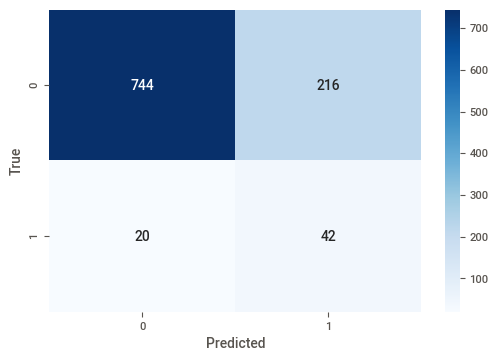

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, cmap="Blues", annot=True, fmt="g")
plt.xlabel("Predicted")
plt.ylabel("True")

In [ ]:
best_tree = randomcv.best_estimator_
feat_imps = best_tree.feature_importances_
feat_imps

array([0.93487135, 0.        , 0.        , 0.06512865, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

(Faltan traer cosas y ordenarlo)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


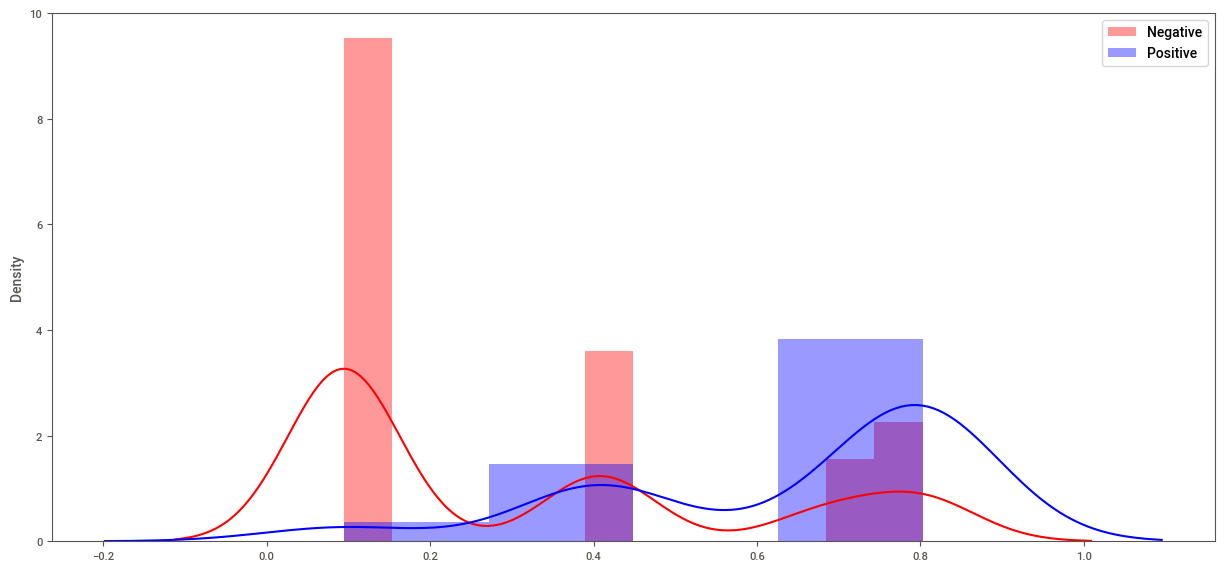

In [ ]:
y_scores = best_tree.predict_proba(x_test)
out_probs = y_scores[:, 1]

plt.figure(figsize=(15, 7))
sns.distplot(out_probs[y_test == 0], color="r", label="Negative")
sns.distplot(out_probs[y_test == 1], color="b", label="Positive")
plt.legend()

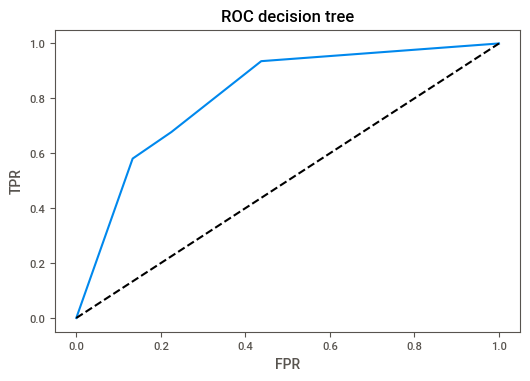

In [ ]:
fpr, tpr, th = roc_curve(y_test, out_probs)

plt.title("ROC decision tree")
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(fpr, fpr, "--k")

h) Graficar el árbol de decisión con mejor performance encontrado en el punto g2). Analizar el árbol de decisión armado (atributos elegidos y decisiones evaluadas).


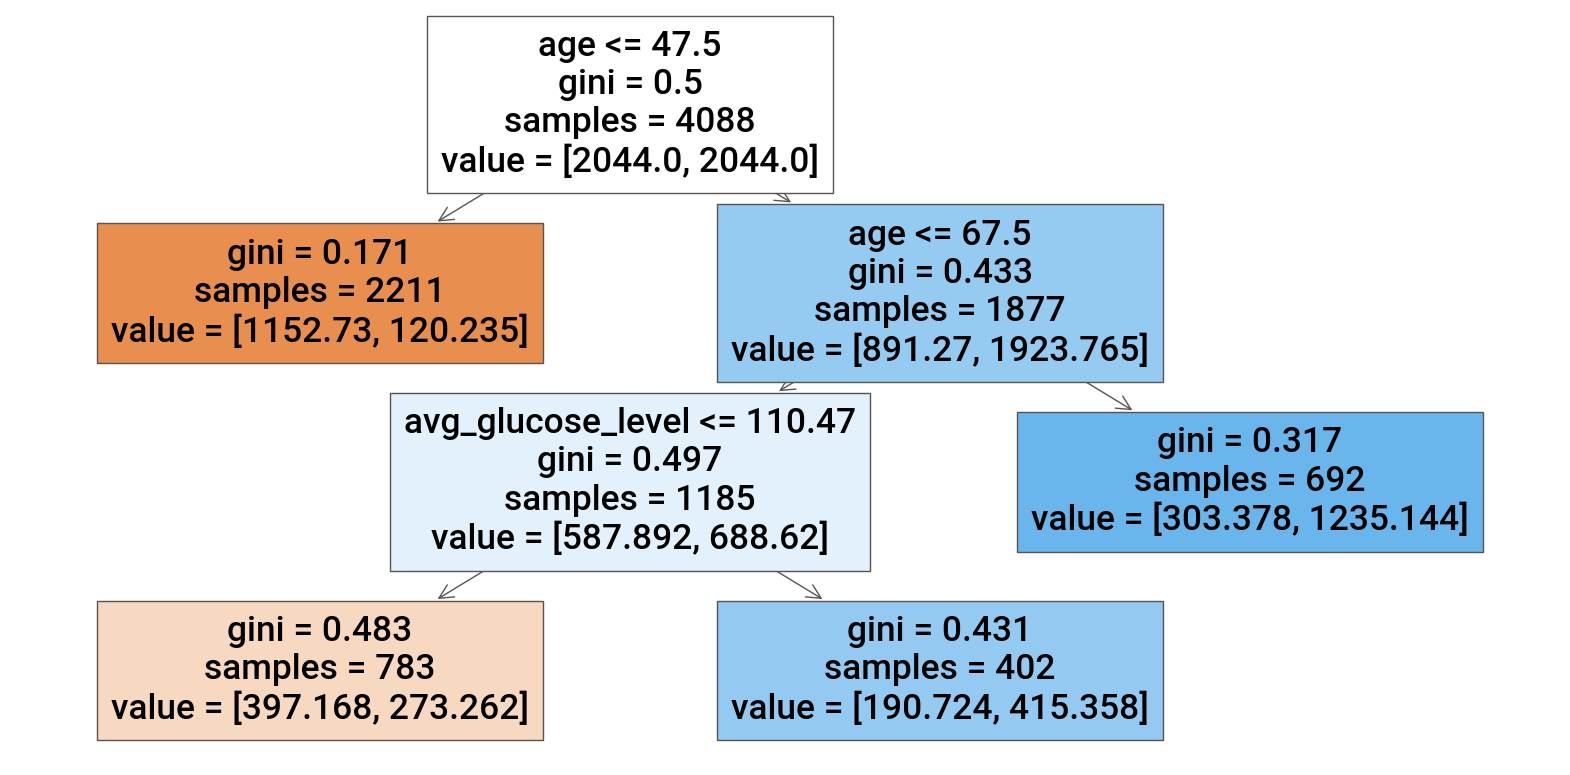

In [ ]:
fig = plt.figure(figsize=(20, 10))
featnames = data.columns
plot_tree(
    best_model, feature_names=featnames, filled=True, proportion=False, impurity=True
)

fig.savefig(
    "{0}.decistion_tree.png".format(datetime.datetime.now().strftime("%Y-%m-%d.%H:%M"))
)

# Que es value? Tiene que ver con el rango, pero al estar desbalanceado
#    pondera por el peso y ajusta el rango así (O algo así nos comentó leo)

**Gini**: 
Es decir, la función toma valores próximos a cero cuando la proporción p de una clase es muy pequeña (lo que implica que el conjunto de valores está muy ordenado, pues si hay pocos elementos de la clase considerada significa que hay muchos de las demás clases) o cuando es muy grande (lo que implica, nuevamente, que hay pocos elementos de las demás clases y que el conjunto está muy ordenado).

El valor máximo de la función anterior se alcanza cuando la proporción es 0.25, lo que implica que, en un escenario con dos clases, el valor máximo del índice de Gini será de 0.5 (0.25 aportado por la primera clase más 0.25 aportado por la segunda clase).

En 0.5 es como tirar una moneda al aire. 0 y 1, es completamente pura.

In [ ]:
text_representation = tree.export_text(decision_tree=best_model, feature_names=list(data.columns))
print(text_representation)

# Más info para visualizaciones: https://mljar.com/blog/visualize-decision-tree/

|--- feature_0 <= 47.50
|   |--- class: 0
|--- feature_0 >  47.50
|   |--- feature_0 <= 67.50
|   |   |--- feature_3 <= 110.47
|   |   |   |--- class: 0
|   |   |--- feature_3 >  110.47
|   |   |   |--- class: 1
|   |--- feature_0 >  67.50
|   |   |--- class: 1



In [ ]:
# Feature importance

importancia_predictores = pd.DataFrame(
    {"predictor": data.columns, "importancia": best_model.feature_importances_}
)
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values("importancia", ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,age,0.934871
3,avg_glucose_level,0.065129
10,work_type_Never_worked,0.000000
17,smoking_status_smokes,0.000000
16,smoking_status_never_smoked,0.000000
15,smoking_status_formerly_smoked,0.000000
14,smoking_status_Unknown,0.000000
13,work_type_children,0.000000
12,work_type_Self-employed,0.000000
11,work_type_Private,0.000000


**TBD** Observaciones sobre features y el peso a partir de la 3°. 

## Distintos alfas

Con 10-folds cross validation

i) Usando validación cruzada de 10 iteraciones (10-fold cross validation), probar distintos valores de α del algoritmo de poda mínima de complejidad de costos (algoritmo de poda de sklearn). Hacer gráficos de la performance en validación y entrenamiento en función del α. Explicar cómo varía la profundidad de los árboles al realizar la poda con distintos valores de α.

**ref**: https://scikit-learn.org/dev/auto_examples/tree/plot_cost_complexity_pruning.html


In [ ]:
path = best_model.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

**TBD**

For i in range(0, 0.1, 10):
    10 k-fold validation con alfa = i
    
Registrar profundidad, leaf, nodes
   

j) Evaluar en el conjunto de evaluación, el árbol correspondiente al α que maximice la performance en el conjunto de validación. Comparar con el caso sin poda (α=0)
***


In [ ]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

#### Arbol sin poda

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=42, stratify=target.values
)
best_model = tree.DecisionTreeClassifier(
    criterion="gini",
    max_depth=5,
#     max_depth=None,
    min_samples_leaf=3,
    ccp_alpha=0.0,
    class_weight="balanced",
)

best_model.fit(x_train, y_train)
y_pred_test = best_model.predict(x_test)
y_pred_train = best_model.predict(x_train)

print("Train acc: {}".format(accuracy_score(y_train, y_pred_train)))
print("Test acc: {}".format(accuracy_score(y_test, y_pred_test)))
print("F1: {}".format(fbeta_score(y_test, y_pred_test, beta=1)))
print("F2: {}".format(fbeta_score(y_test, y_pred_test, beta=2)))
print(classification_report(y_test, y_pred_test))

predictions = best_model.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, cmap="Blues", annot=True, fmt="g")
plt.xlabel("Predicted")
plt.ylabel("True")

In [ ]:
y_scores = best_tree.predict_proba(x_test)
out_probs = y_scores[:, 1]

plt.figure(figsize=(15, 7))
sns.distplot(out_probs[y_test == 0], color="r", label="Negative")
sns.distplot(out_probs[y_test == 1], color="b", label="Positive")
plt.legend()

In [ ]:
fpr, tpr, th = roc_curve(y_test, out_probs)

plt.title("ROC decision tree")
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(fpr, fpr, "--k")

In [ ]:
fig = plt.figure(figsize=(20, 10))
featnames = data.columns
plot_tree(
    best_model, feature_names=featnames, filled=True, proportion=False, impurity=True
)

fig.savefig(
    "{0}.decistion_tree.png".format(datetime.datetime.now().strftime("%Y-%m-%d.%H:%M"))
)

# Que es value? Tiene que ver con el rango, pero al estar desbalanceado
#    pondera por el peso y ajusta el rango así (O algo así nos comentó leo)

In [ ]:
importancia_predictores = pd.DataFrame(
    {"predictor": data.columns, "importancia": best_model.feature_importances_}
)
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values("importancia", ascending=False)

La gráfica muestra como overfittea, y termina casi todas las variables, absurdamente específico

## Descriptores

-----

k) Para el árbol sin poda, obtener la importancia de los descriptores usando la técnica de eliminación recursiva. Reentrenar el árbol usando sólo los 3 descriptores más importantes. Comparar la performance en el conjunto de prueba.

-----

**ref**: https://towardsdatascience.com/feature-selection-techniques-1bfab5fe0784

_Recursive Feature Elimination (RFE)_ takes as input the instance of a Machine Learning model and the final desired number of features to use. It then recursively reduces the number of features to use by ranking them using the Machine Learning model accuracy as metrics.

In [ ]:
from time import process_time

rfe = RFE(best_model, n_features_to_select=3, verbose=10, step=1)
start = time.process_time()
RFE_X_Train = rfe.fit_transform(x_train, y_train)
RFE_X_Test = rfe.transform(x_test)
rfe = rfe.fit(RFE_X_Train, y_train)
print(f"Tiempo: {time.process_time() - start} segundos")
# print(f"Tiempo: {round(time.process_time() - start, 2)} segundos")
print("Overall Accuracy using RFE: ", rfe.score(RFE_X_Test, y_test))

0.1474522739999955
Overall Accuracy using RFE:  0.7690802348336595


In [ ]:
# TBD: Usar predict con test y usar despues la métrica que nos interesa
y_pred_test = rfe.predict(RFE_X_Test)
y_pred_train = rfe.predict(RFE_X_Train)

print("Train acc: {}".format(accuracy_score(y_train, y_pred_train)))
print("Test acc: {}".format(accuracy_score(y_test, y_pred_test)))
print("F1: {}".format(fbeta_score(y_test, y_pred_test, beta=1)))
print("F2: {}".format(fbeta_score(y_test, y_pred_test, beta=2)))

print(classification_report(y_test, y_pred_test))
predictions = rfe.predict(RFE_X_Test)

In [ ]:
# TBD: Mostrar más métricas
# TBD: RFE que significaría?

# Fin

Atención: los puntos anteriores no necesariamente deben ser respondidos en el mismo orden en el que son formulados. El único requisito es que sus respuestas estén en alguna parte del informe entregado.   
